In [1]:
import csv
from statistics import mean 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor

In [2]:
lc2 = pd.read_csv("C:\\Users\spand\\Downloads\\LC2_18Jan.csv")

C:\Users\spand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
lc2

created_at  PM10_2  PM2.5_2   RH_2  Temp_2  CO_2  NO2_2  \
0       2020-10-09 11:52:30 IST    57.1     51.5  75.02   27.98  1.28   0.32   
1       2020-10-09 11:53:00 IST    57.5     51.6  74.86   27.99  1.23   0.33   
2       2020-10-09 11:53:30 IST    59.2     53.2  74.89   27.98  1.17   0.35   
3       2020-10-09 11:54:00 IST    57.5     51.8  74.86   27.96  1.17   0.36   
4       2020-10-09 11:54:30 IST    58.3     52.6  74.86   27.94  1.11   0.37   
...                         ...     ...      ...    ...     ...   ...    ...   
269859  2021-01-18 18:57:30 IST    39.7     36.3  44.32   30.05  0.48   4.87   
269860  2021-01-18 18:58:00 IST    39.0     35.8  44.35   30.04  0.48   4.87   
269861  2021-01-18 18:58:30 IST    40.1     36.7  44.35   30.03  0.48   4.87   
269862  2021-01-18 18:59:00 IST    39.4     36.2  44.35   30.04  0.48   4.83   
269863  2021-01-18 18:59:30 IST    38.6     35.4  44.42   30.04  0.48   4.87   

       NH3_2  
0       0.11  
1       0.11  
2        0.1  
3       0.09  
4       0.09  
...      ...  
269859  0.01  
269860  0.01  
269861  0.01  
269862  0.02  
269863  0.02  

[269864 rows x 8 columns]

In [4]:
lc3 = pd.read_csv("C:\\Users\spand\\Downloads\\LC3_18Jan.csv")

C:\Users\spand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
lc3

created_at  PM10_3  PM2.5_3   RH_3  Temp_3  CO_3  NO2_3  \
0       2020-09-17 19:15:30 IST    19.1     15.1  83.26   27.72  0.48   0.20   
1       2020-09-17 19:16:00 IST    19.0     15.2  83.26   27.74  0.44   0.22   
2       2020-09-17 19:16:30 IST    18.6     15.0  83.35   27.72  0.44   0.24   
3       2020-09-17 19:17:00 IST    18.8     15.8  83.32   27.71  0.44   0.26   
4       2020-09-17 19:17:30 IST    19.3     15.9  83.38   27.71  0.44   0.28   
...                         ...     ...      ...    ...     ...   ...    ...   
310693  2021-01-18 18:58:00 IST    77.6     58.8  49.92   27.59  0.53   5.33   
310694  2021-01-18 18:58:30 IST    80.8     60.0  49.95   27.59  0.53   5.28   
310695  2021-01-18 18:59:00 IST    82.7     61.2  49.95   27.58  0.53   5.28   
310696  2021-01-18 18:59:30 IST    79.7     59.8  50.02   27.60  0.53   5.28   
310697  2021-01-18 19:00:00 IST    80.0     59.7  50.08   27.59  0.58   5.24   

       NH3_3  
0        2.2  
1       1.96  
2        1.7  
3        1.5  
4       1.36  
...      ...  
310693  0.01  
310694  0.01  
310695  0.01  
310696  0.01  
310697  0.01  

[310698 rows x 8 columns]

In [6]:
lc2['created_at'] = pd.to_datetime(lc2['created_at'])
lc3['created_at'] = pd.to_datetime(lc3['created_at'])

C:\Users\spand\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [7]:
LC2 = pd.DataFrame(columns = ['created_at', 'PM10_2', 'PM2.5_2', 'RH_2', 'Temperature_2'])
LC3 = pd.DataFrame(columns = ['created_at', 'PM10_3', 'PM2.5_3', 'RH_3', 'Temperature_3'])

In [8]:
pm10 = []
pm25 = []
rh = []
temp = []

for i in range(len(lc2)):
    if(len(pm10) == 0):
        time = lc2['created_at'][i]
        pm10.append(lc2['PM10_2'][i])
        pm25.append(lc2['PM2.5_2'][i])
        rh.append(lc2['RH_2'][i])
        temp.append(lc2['Temp_2'][i])
        
    else:

        prev = time - pd.to_timedelta(time.time().minute % 15, unit='m') - pd.to_timedelta(time.time().second, unit='s')
        current_time = lc2['created_at'][i] 
        convert_time = current_time - pd.to_timedelta(current_time.time().minute % 15, unit = 'm') - pd.to_timedelta(current_time.time().second, unit='s')

        if(prev == convert_time):
            time = lc2['created_at'][i]
            pm10.append(lc2['PM10_2'][i])
            pm25.append(lc2['PM2.5_2'][i])
            rh.append(lc2['RH_2'][i])
            temp.append(lc2['Temp_2'][i])
           

        else:

            avg_pm10 = round(mean(pm10), 2)
            avg_pm25 = round(mean(pm25), 2)
            avg_rh = round(mean(rh), 2)
            avg_temp = round(mean(temp), 2)
            

            time = time - pd.to_timedelta(time.time().minute % 15,unit='m') - pd.to_timedelta(time.time().second, unit='s')
            data = {'created_at': time, 'PM10_2' : avg_pm10, 'PM2.5_2': avg_pm25, 'RH_2': avg_rh, 'Temperature_2': avg_temp}

            LC2 = LC2.append(data, ignore_index=True)

            pm10.clear()
            pm25.clear()
            rh.clear()
            temp.clear()
            
            
    
            pm10.append(lc2['PM10_2'][i])
            pm25.append(lc2['PM2.5_2'][i])
            rh.append(lc2['RH_2'][i])
            temp.append(lc2['Temp_2'][i])
           
    

            time = lc2['created_at'][i]

In [10]:
pm10 = []
pm25 = []
rh = []
temp = []

for i in range(len(lc3)):
    if(len(pm10) == 0):
        time = lc3['created_at'][i]
        pm10.append(lc3['PM10_3'][i])
        pm25.append(lc3['PM2.5_3'][i])
        rh.append(lc3['RH_3'][i])
        temp.append(lc3['Temp_3'][i])
        
    else:

        prev = time - pd.to_timedelta(time.time().minute % 15, unit='m') - pd.to_timedelta(time.time().second, unit='s')
        current_time = lc3['created_at'][i] 
        convert_time = current_time - pd.to_timedelta(current_time.time().minute % 15, unit = 'm') - pd.to_timedelta(current_time.time().second, unit='s')

        if(prev == convert_time):
            time = lc3['created_at'][i]
            pm10.append(lc3['PM10_3'][i])
            pm25.append(lc3['PM2.5_3'][i])
            rh.append(lc3['RH_3'][i])
            temp.append(lc3['Temp_3'][i])
           

        else:

            avg_pm10 = round(mean(pm10), 2)
            avg_pm25 = round(mean(pm25), 2)
            avg_rh = round(mean(rh), 2)
            avg_temp = round(mean(temp), 2)
            

            time = time - pd.to_timedelta(time.time().minute % 15,unit='m') - pd.to_timedelta(time.time().second, unit='s')
            data = {'created_at': time, 'PM10_3' : avg_pm10, 'PM2.5_3': avg_pm25, 'RH_3': avg_rh, 'Temperature_3': avg_temp}

            LC3 = LC3.append(data, ignore_index=True)

            pm10.clear()
            pm25.clear()
            rh.clear()
            temp.clear()
            
            
    
            pm10.append(lc3['PM10_3'][i])
            pm25.append(lc3['PM2.5_3'][i])
            rh.append(lc3['RH_3'][i])
            temp.append(lc3['Temp_3'][i])
           
    

            time = lc3['created_at'][i]

In [9]:
LC2

created_at  PM10_2  PM2.5_2   RH_2  Temperature_2
0    2020-10-09 11:45:00   58.17    52.37  74.91          27.95
1    2020-10-09 12:00:00   60.80    54.68  73.25          28.59
2    2020-10-09 12:15:00   60.22    54.14  72.23          28.83
3    2020-10-09 12:30:00   60.48    54.48  71.39          29.10
4    2020-10-09 12:45:00   64.50    58.11  70.92          29.07
...                  ...     ...      ...    ...            ...
9347 2021-01-18 17:30:00   35.81    32.77  40.95          31.89
9348 2021-01-18 17:45:00   36.28    33.23  41.91          31.48
9349 2021-01-18 18:00:00   37.25    34.14  43.01          30.94
9350 2021-01-18 18:15:00   38.19    35.00  43.60          30.63
9351 2021-01-18 18:30:00   39.83    36.44  44.44          30.15

[9352 rows x 5 columns]

In [11]:
LC3

created_at  PM10_3  PM2.5_3   RH_3  Temperature_3
0     2020-09-17 19:15:00   18.88    15.37  83.38          27.73
1     2020-09-17 19:30:00   17.72    14.44  83.70          27.73
2     2020-09-17 19:45:00   16.96    15.01  82.46          28.03
3     2020-09-17 20:00:00   16.89    14.92  81.94          28.07
4     2020-09-17 20:15:00   17.12    15.28  81.38          28.07
...                   ...     ...      ...    ...            ...
10841 2021-01-18 17:45:00   74.34    54.83  46.24          29.30
10842 2021-01-18 18:00:00   74.36    56.09  47.54          28.79
10843 2021-01-18 18:15:00   77.94    58.70  48.67          28.30
10844 2021-01-18 18:30:00   80.20    59.91  49.48          27.93
10845 2021-01-18 18:45:00   81.74    60.22  49.73          27.70

[10846 rows x 5 columns]

In [112]:
cpcb_oct = pd.read_csv("C:\\Users\\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\cpcb_oct_15min.csv")
cpcb_nov = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\cpcb_nov15min.csv")
cpcb_dec = pd.read_csv("C:\\Users\spand\\OneDrive\\Documents\\GitHub\\Air-Pollution\\Data\\cpcb_dec15min.csv")

In [113]:
cpcb_oct

created_at  PM10  PM2.5  RH  Temp
0     01-10-2020 00:00    52     36  85    29
1     01-10-2020 00:15    52     36  85    29
2     01-10-2020 00:30    52     36  86    29
3     01-10-2020 00:45    51     34  86    29
4     01-10-2020 01:00    51     34  86  29.1
...                ...   ...    ...  ..   ...
2639  31-10-2020 22:30   172     73  61  29.5
2640  31-10-2020 22:45   179     86  61  29.5
2641  31-10-2020 23:00   179     86  60  29.4
2642  31-10-2020 23:15   179     86  59  29.4
2643  31-10-2020 23:30   179     86  59  29.5

[2644 rows x 5 columns]

In [114]:
cpcb_nov

created_at  PM10  PM2.5  RH  Temp
0     01-11-2020 00:00   172     73  61  29.4
1     01-11-2020 00:15   172     73  62  29.4
2     01-11-2020 00:30   172     73  63  29.4
3     01-11-2020 00:45   158     80  64  29.4
4     01-11-2020 01:00   158     80  63  29.4
...                ...   ...    ...  ..   ...
2835  30-11-2020 22:30   188     84  76  29.3
2836  30-11-2020 22:45   184     86  77  29.4
2837  30-11-2020 23:00   184     86  78  29.3
2838  30-11-2020 23:15   184     86  78  29.4
2839  30-11-2020 23:30   184     86  78  29.3

[2840 rows x 5 columns]

In [115]:
cpcb_dec

created_at  PM10  PM2.5  RH  Temp
0     01-12-2020 00:00   171     86  78  29.3
1     01-12-2020 00:15   171     86  79  29.3
2     01-12-2020 00:30   171     86  79  29.3
3     01-12-2020 00:45   153     79  80  29.3
4     01-12-2020 01:00   153     79  80  29.4
...                ...   ...    ...  ..   ...
2827  01-01-2021 08:30   152     84  75  29.4
2828  01-01-2021 08:45   170     78  74  29.4
2829  01-01-2021 09:00   170     78  72  29.3
2830  01-01-2021 09:15   170     78  69  29.3
2831  01-01-2021 09:30   170     78  69  29.3

[2832 rows x 5 columns]

In [116]:
cpcb_oct['created_at'] = pd.to_datetime(cpcb_oct['created_at'], dayfirst = True)
cpcb_nov['created_at'] = pd.to_datetime(cpcb_nov['created_at'], dayfirst = True)
cpcb_dec['created_at'] = pd.to_datetime(cpcb_dec['created_at'], dayfirst = True)

In [117]:
cpcb_oct

created_at  PM10  PM2.5  RH  Temp
0    2020-10-01 00:00:00    52     36  85    29
1    2020-10-01 00:15:00    52     36  85    29
2    2020-10-01 00:30:00    52     36  86    29
3    2020-10-01 00:45:00    51     34  86    29
4    2020-10-01 01:00:00    51     34  86  29.1
...                  ...   ...    ...  ..   ...
2639 2020-10-31 22:30:00   172     73  61  29.5
2640 2020-10-31 22:45:00   179     86  61  29.5
2641 2020-10-31 23:00:00   179     86  60  29.4
2642 2020-10-31 23:15:00   179     86  59  29.4
2643 2020-10-31 23:30:00   179     86  59  29.5

[2644 rows x 5 columns]

In [118]:
cpcb_nov

created_at  PM10  PM2.5  RH  Temp
0    2020-11-01 00:00:00   172     73  61  29.4
1    2020-11-01 00:15:00   172     73  62  29.4
2    2020-11-01 00:30:00   172     73  63  29.4
3    2020-11-01 00:45:00   158     80  64  29.4
4    2020-11-01 01:00:00   158     80  63  29.4
...                  ...   ...    ...  ..   ...
2835 2020-11-30 22:30:00   188     84  76  29.3
2836 2020-11-30 22:45:00   184     86  77  29.4
2837 2020-11-30 23:00:00   184     86  78  29.3
2838 2020-11-30 23:15:00   184     86  78  29.4
2839 2020-11-30 23:30:00   184     86  78  29.3

[2840 rows x 5 columns]

In [119]:
cpcb_dec

created_at  PM10  PM2.5  RH  Temp
0    2020-12-01 00:00:00   171     86  78  29.3
1    2020-12-01 00:15:00   171     86  79  29.3
2    2020-12-01 00:30:00   171     86  79  29.3
3    2020-12-01 00:45:00   153     79  80  29.3
4    2020-12-01 01:00:00   153     79  80  29.4
...                  ...   ...    ...  ..   ...
2827 2021-01-01 08:30:00   152     84  75  29.4
2828 2021-01-01 08:45:00   170     78  74  29.4
2829 2021-01-01 09:00:00   170     78  72  29.3
2830 2021-01-01 09:15:00   170     78  69  29.3
2831 2021-01-01 09:30:00   170     78  69  29.3

[2832 rows x 5 columns]

## Node-2 with CPCB

In [120]:
oct2 = pd.merge(cpcb_oct, LC2,  
                   on='created_at',  
                   how='inner') 

In [121]:
oct2

created_at  PM10  PM2.5  RH  Temp  PM10_2  PM2.5_2   RH_2  \
0    2020-10-09 11:45:00    95     53  64  30.5   58.17    52.37  74.91   
1    2020-10-09 12:00:00    95     53  62  30.9   60.80    54.68  73.25   
2    2020-10-09 12:15:00    95     53  62    31   60.22    54.14  72.23   
3    2020-10-09 12:30:00    95     53  63  30.6   60.48    54.48  71.39   
4    2020-10-09 12:45:00   116     58  62  30.3   64.50    58.11  70.92   
...                  ...   ...    ...  ..   ...     ...      ...    ...   
1714 2020-10-31 22:30:00   172     73  61  29.5   64.52    58.39  48.76   
1715 2020-10-31 22:45:00   179     86  61  29.5   62.41    56.52  48.13   
1716 2020-10-31 23:00:00   179     86  60  29.4   85.03    77.21  47.25   
1717 2020-10-31 23:15:00   179     86  59  29.4   67.38    60.83  46.75   
1718 2020-10-31 23:30:00   179     86  59  29.5   65.46    58.77  46.75   

      Temperature_2  
0             27.95  
1             28.59  
2             28.83  
3             29.10  
4             29.07  
...             ...  
1714          29.52  
1715          29.39  
1716          29.27  
1717          29.25  
1718          29.14  

[1719 rows x 9 columns]

In [122]:
nov2 = pd.merge(cpcb_nov, LC2, on = 'created_at', how = 'inner')

In [123]:
nov2

created_at  PM10  PM2.5  RH  Temp  PM10_2  PM2.5_2   RH_2  \
0    2020-11-01 00:00:00   172     73  61  29.4   61.65    55.60  48.01   
1    2020-11-01 00:15:00   172     73  62  29.4   60.97    55.10  49.53   
2    2020-11-01 00:30:00   172     73  63  29.4   57.72    52.08  49.39   
3    2020-11-01 00:45:00   158     80  64  29.4   59.09    53.38  49.53   
4    2020-11-01 01:00:00   158     80  63  29.4   58.19    52.61  50.14   
...                  ...   ...    ...  ..   ...     ...      ...    ...   
2835 2020-11-30 22:30:00   188     84  76  29.3   57.56    51.60  58.91   
2836 2020-11-30 22:45:00   184     86  77  29.4   57.95    51.71  59.37   
2837 2020-11-30 23:00:00   184     86  78  29.3   57.53    51.54  59.55   
2838 2020-11-30 23:15:00   184     86  78  29.4   57.11    51.31  59.68   
2839 2020-11-30 23:30:00   184     86  78  29.3   57.96    52.06  59.91   

      Temperature_2  
0             28.96  
1             28.84  
2             28.64  
3             28.51  
4             28.39  
...             ...  
2835          27.67  
2836          27.48  
2837          27.36  
2838          27.26  
2839          27.09  

[2840 rows x 9 columns]

In [124]:
dec2 = pd.merge(cpcb_dec, LC2, on = 'created_at', how = 'inner')

In [125]:
dec2

created_at  PM10  PM2.5  RH  Temp  PM10_2  PM2.5_2   RH_2  \
0    2020-12-01 00:00:00   171     86  78  29.3   59.29    53.06  59.96   
1    2020-12-01 00:15:00   171     86  79  29.3   59.06    53.11  60.24   
2    2020-12-01 00:30:00   171     86  79  29.3   59.47    53.50  60.49   
3    2020-12-01 00:45:00   153     79  80  29.3   58.62    52.89  60.52   
4    2020-12-01 01:00:00   153     79  80  29.4   58.42    52.77  60.36   
...                  ...   ...    ...  ..   ...     ...      ...    ...   
2667 2021-01-01 08:30:00   152     84  75  29.4  126.72   116.19  58.47   
2668 2021-01-01 08:45:00   170     78  74  29.4  125.60   115.21  57.55   
2669 2021-01-01 09:00:00   170     78  72  29.3  123.33   113.22  56.02   
2670 2021-01-01 09:15:00   170     78  69  29.3  121.20   111.27  53.85   
2671 2021-01-01 09:30:00   170     78  69  29.3  118.88   109.17  53.49   

      Temperature_2  
0             26.85  
1             26.67  
2             26.53  
3             26.51  
4             26.50  
...             ...  
2667          26.61  
2668          26.83  
2669          27.48  
2670          27.95  
2671          27.88  

[2672 rows x 9 columns]

## October

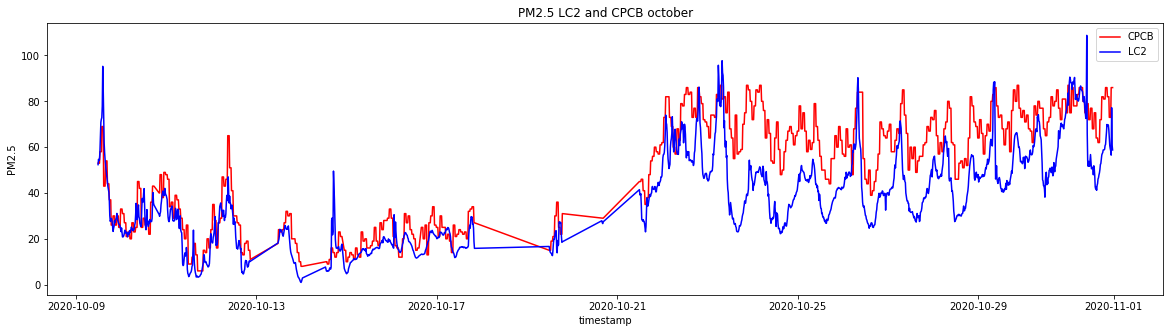

In [126]:
x = oct2['created_at']
y1 = oct2['PM2.5']
y2 = oct2['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB october')
plt.show()

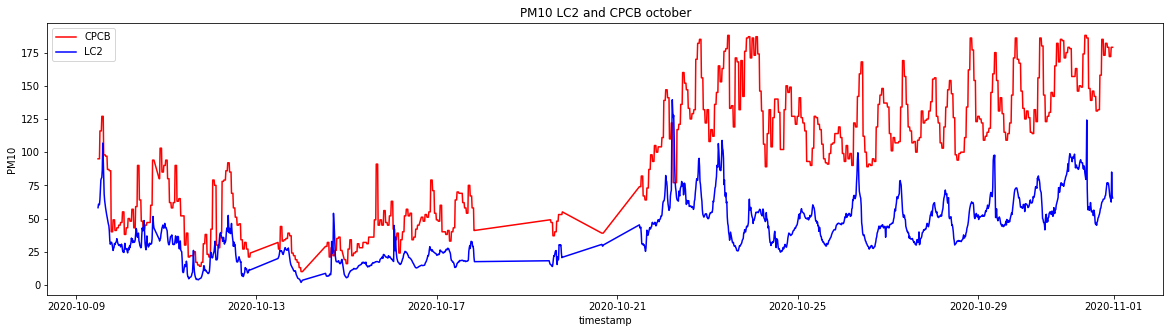

In [127]:
x = oct2['created_at']
y_1 = oct2['PM10']
y_2 = oct2['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_1, 'r') 
plt.plot(x, y_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB october')
plt.show()

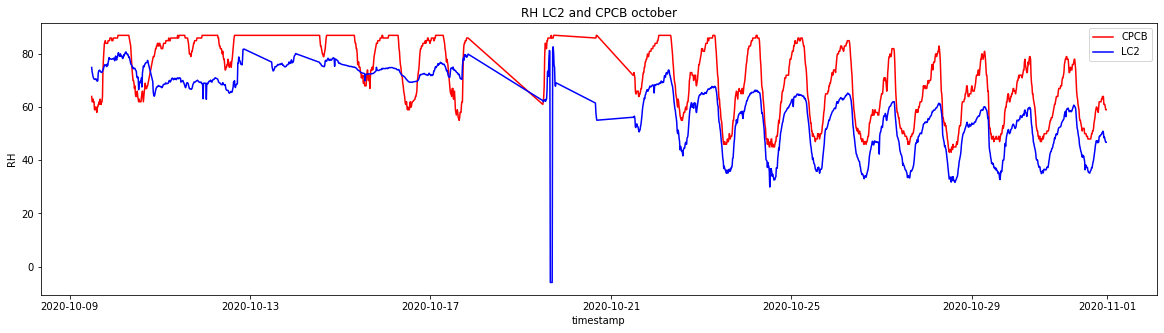

In [128]:

x = oct2['created_at']
y1_r = oct2['RH']
y2_r = oct2['RH_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1_r, 'r') 
plt.plot(x, y2_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["CPCB", 'LC2'])
plt.title('RH LC2 and CPCB october')
plt.show()

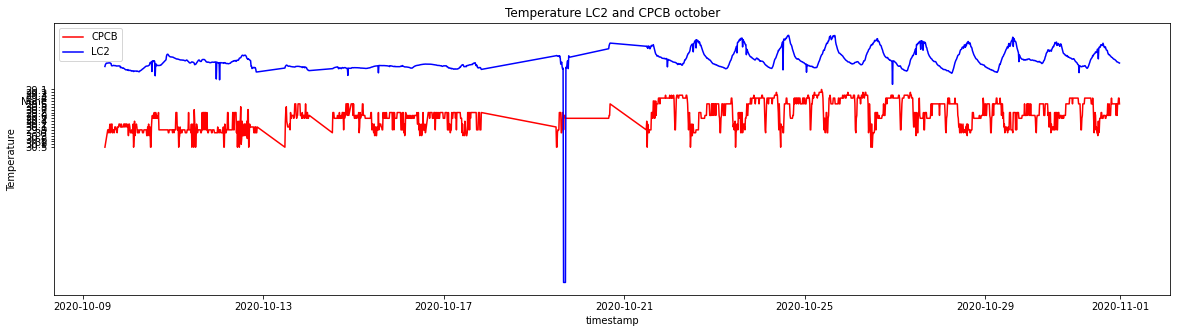

In [133]:
oct2_temp = oct2.dropna()
x = oct2_temp['created_at']
y1_t = oct2_temp['Temp']
y2_t = oct2_temp['Temperature_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1_t, 'r') 
plt.plot(x, y2_t, 'b') 
plt.xlabel('timestamp')
plt.ylabel('Temperature')
plt.legend(["CPCB", 'LC2'])
plt.title('Temperature LC2 and CPCB october')
plt.show()

max correlation is at lag 2
max correlation is  0.87
Pearsons correlation: 0.867
MSE PM2.5:  314.71354764397904
MAE PM2.5:  14.284979639325188
RMSE PM2.5:  17.740167632916524


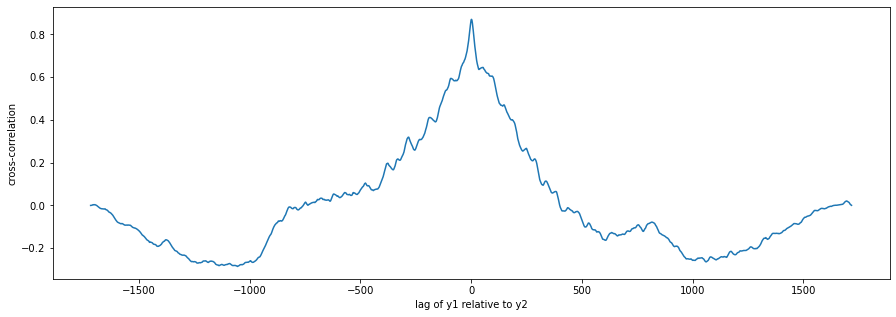

In [134]:
npts = len(oct2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1, y2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2['PM2.5_2'], oct2['PM2.5'])
MAE = mean_absolute_error(oct2['PM2.5_2'], oct2['PM2.5'])
print("MSE PM2.5: ", MSE)
print("MAE PM2.5: ", MAE)
print("RMSE PM2.5: ", np.sqrt(mean_squared_error(oct2['PM2.5_2'], oct2['PM2.5'])))

max correlation is at lag 2
max correlation is  0.794
Pearsons correlation: 0.789
MSE PM10:  4351.55722565445
MAE PM10:  56.501785922047695
RMSE PM10:  65.9663340322505


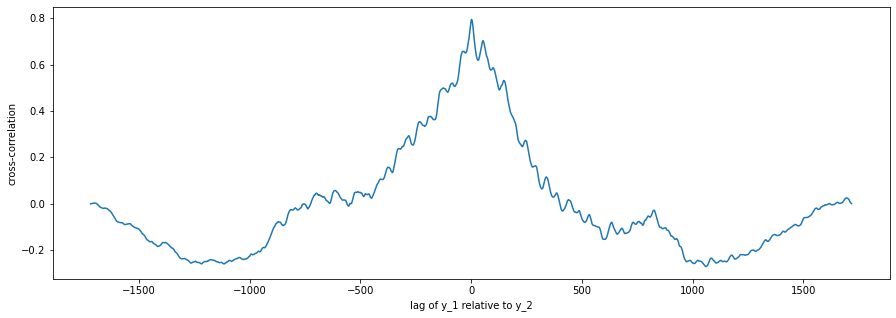

In [135]:
npts = len(oct2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_1 - y_1.mean(), y_2 - y_2.mean(), mode='full')
ccor = ccov / (npts * y_1.std() * y_2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_1 relative to y_2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_1, y_2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2['PM10_2'], oct2['PM10'])
MAE = mean_absolute_error(oct2['PM10_2'], oct2['PM10'])
print("MSE PM10: ", MSE)
print("MAE PM10: ", MAE)
print("RMSE PM10: ", np.sqrt(mean_squared_error(oct2['PM10_2'], oct2['PM10'])))

## Simple Linear Regression '

Coefficients:  [[1.05130328]]
Intercept:  [10.99480812]
R2  0.7391103397284196
MAE of simple linear regression 9.71200436400846
MSE of simple linear regression 146.13955929924754
RMSE of simple linear regression 12.088819599086072
Test data Spearman correlation of simple linear regression: 0.894
Train data Spearman correlation of simple linear regression: 0.9


<ipython-input-233-389d2e9c45a7>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


Mean Absolute Error Random Forest: 8.305881094952952
Mean Squared Error Random Forest: 127.86239004881392
Root Mean Squared Error Random Forest: 11.30762530546595
Test data R-2 score Random Forest: 0.772
Test data Spearman correlation Random Forest: 0.862


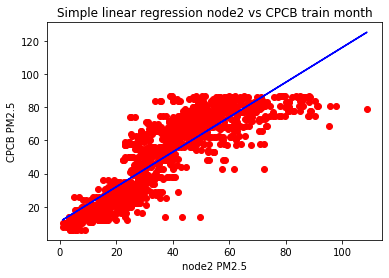

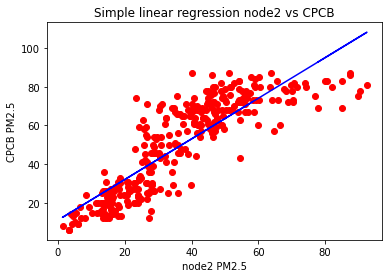

In [233]:
msk = (np.random.rand(len(oct2)) < 0.8)
train = oct2[msk]
test = oct2[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [234]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 1.44131642 -0.35243897]]
Intercept:  [11.05678639]
R2  0.7434653986983433
MAE  9.598822849049348
MSE  143.70003602368212
RMSE  11.987494985345442
variance score = 0.744074743796722
Test data Spearman correlation: 0.896
Mean Absolute Error Random Forest: 7.4277445109780444
Mean Squared Error Random Forest: 104.9430871590153
Root Mean Squared Error Random Forest: 10.244173327263422
Test data R-2 score Random Forest: 0.813
Test data Spearman correlation Random Forest: 0.891


<ipython-input-234-99ab4e77ba12>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [235]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.91357066 -0.58167214]]
Intercept:  [51.26216524]
R2  0.8420589067099852
MAE  7.449897437994336
MSE  88.47204501940334
RMSE  9.405957953308283
variance score = 0.8421958579036135
Test data Spearman correlation: 0.898
Mean Absolute Error Random Forest: 5.27125748502994
Mean Squared Error Random Forest: 46.49125748502994
Root Mean Squared Error Random Forest: 6.818449786060607
Test data R-2 score Random Forest: 0.917
Test data Spearman correlation Random Forest: 0.933


<ipython-input-235-5913e91b0b73>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [236]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2','RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2','RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.9400959  -0.02376604 -0.58072001]]
Intercept:  [51.20043161]
R2  0.84212364845933
MAE  7.445621012925587
MSE  88.43577937856631
RMSE  9.404029954150843
variance score = 0.8422605033537882
Test data Spearman correlation: 0.898
Mean Absolute Error Random Forest: 5.052994011976048
Mean Squared Error Random Forest: 42.72206586826348
Root Mean Squared Error Random Forest: 6.536211889792395
Test data R-2 score Random Forest: 0.924
Test data Spearman correlation Random Forest: 0.938


<ipython-input-236-7f050ed566fa>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


 ## Removing values with RH > 75

In [136]:
oct2_rh = oct2[oct2['RH_2'] < 75]

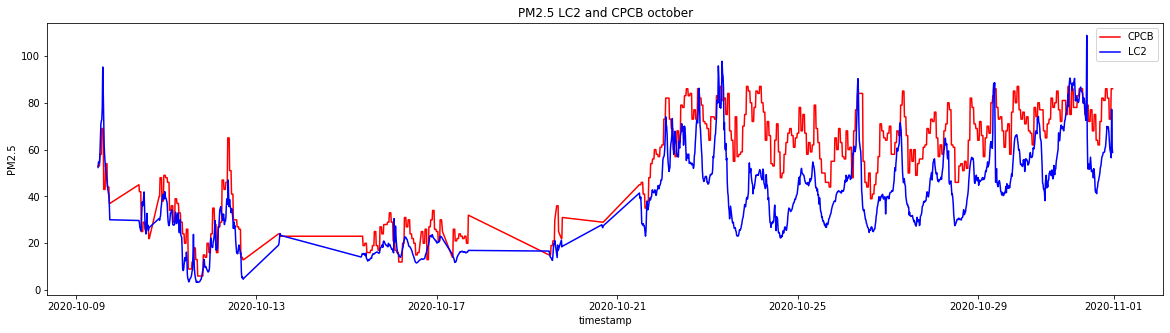

In [137]:
x = oct2_rh['created_at']
y11 = oct2_rh['PM2.5']
y22 = oct2_rh['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y11, 'r') 
plt.plot(x, y22, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB october')
plt.show()

max correlation is at lag 2
max correlation is  0.851
Pearsons correlation: 0.847
MSE:  358.9029822690217
MAE:  15.740264945652173
RMSE  18.944734948502756


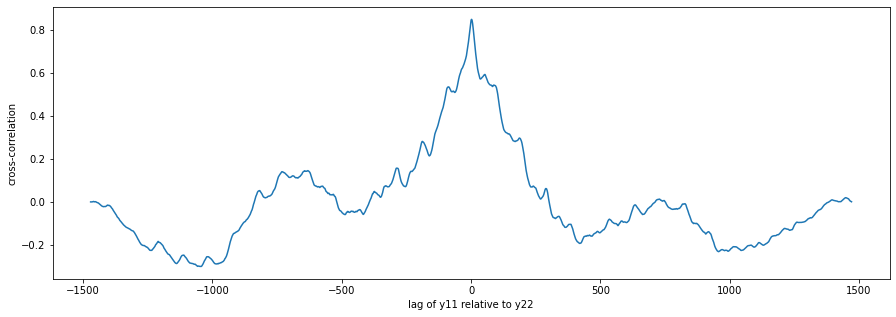

In [138]:
npts = len(oct2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y11 - y11.mean(), y22 - y22.mean(), mode='full')
ccor = ccov / (npts * y11.std() * y22.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y11 relative to y22')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y11, y22) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2_rh['PM2.5_2'], oct2_rh['PM2.5'])
MAE = mean_absolute_error(oct2_rh['PM2.5_2'], oct2_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(oct2_rh['PM2.5_2'], oct2_rh['PM2.5'])))

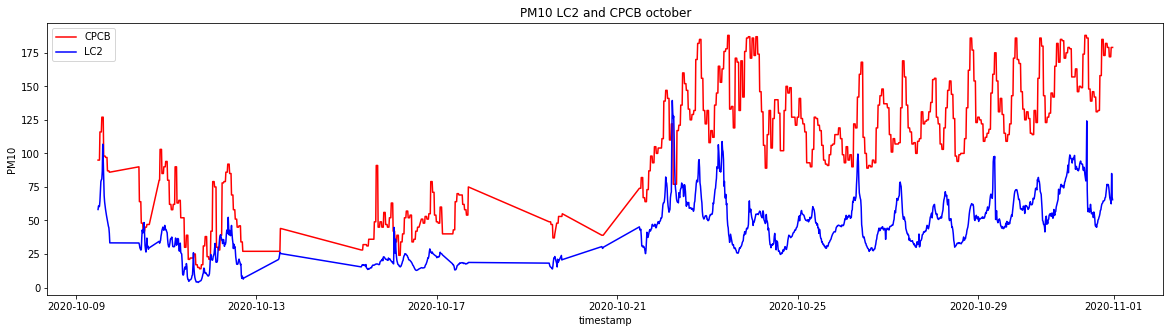

In [139]:
x = oct2_rh['created_at']
y1_1 = oct2_rh['PM10']
y2_2 = oct2_rh['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1_1, 'r') 
plt.plot(x, y2_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB october')
plt.show()

max correlation is at lag 2
max correlation is  0.759
Pearsons correlation: 0.751
MSE:  5013.683326154892
MAE:  63.06228940217392
RMSE  70.80736773920417


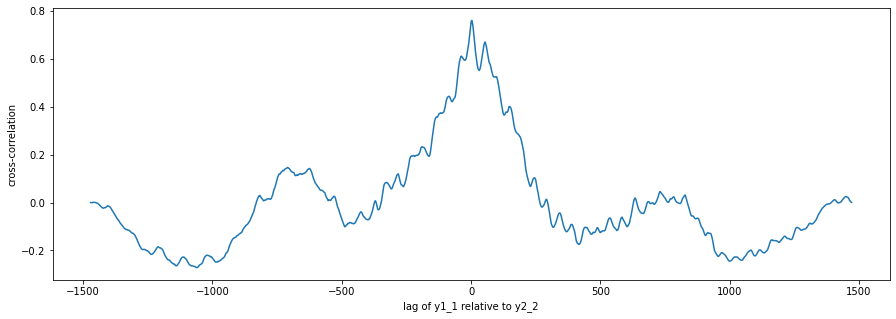

In [140]:
npts = len(oct2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1_1 - y1_1.mean(), y2_2 - y2_2.mean(), mode='full')
ccor = ccov / (npts * y1_1.std() * y2_2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1_1 relative to y2_2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1_1, y2_2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct2_rh['PM10_2'], oct2_rh['PM10'])
MAE = mean_absolute_error(oct2_rh['PM10_2'], oct2_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(oct2_rh['PM10_2'], oct2_rh['PM10'])))

Coefficients:  [[0.989408]]
Intercept:  [15.20021155]
R2  0.6850467402901823
MAE of simple linear regression 10.225231009380789
MSE of simple linear regression 156.66887728426576
RMSE of simple linear regression 12.516743877073852
Test data Spearman correlation of simple linear regression: 0.843
Train data Spearman correlation of simple linear regression: 0.876
Mean Absolute Error Random Forest: 8.675238870792617
Mean Squared Error Random Forest: 129.8088803926891
Root Mean Squared Error Random Forest: 11.39337001912468
Test data R-2 score Random Forest: 0.739
Test data Spearman correlation Random Forest: 0.794


<ipython-input-238-4b3ee8463f52>:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x, train_y)


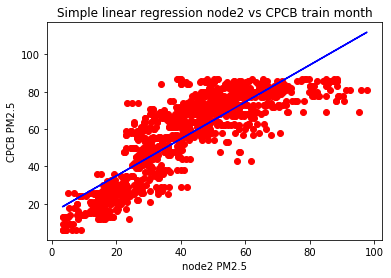

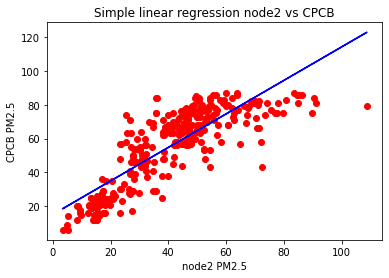

In [238]:
msk = (np.random.rand(len(oct2_rh)) < 0.8)
train = oct2_rh[msk]
test = oct2_rh[~msk]
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['PM2.5_2']])
train_y = np.asanyarray(train[['PM2.5']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x = np.asanyarray(test[['PM2.5_2']])
test_y = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x)

ssr = np.sum((test_y_hat - test_y)**2)
ssr

#  total sum of squares
sst = np.sum((test_y - np.mean(test_y))**2)
sst

# R2 score
r2 = 1 - (ssr/sst)
print("R2 ", r2)

# MAE
print("MAE of simple linear regression", metrics.mean_absolute_error(test_y,test_y_hat))

#MSE
print("MSE of simple linear regression", mean_squared_error(test_y, test_y_hat))

#RMSE
print("RMSE of simple linear regression", np.sqrt(mean_squared_error(test_y, test_y_hat)))

spearman = spearmanr(test_y, test_y_hat)
spearman1 = spearmanr(train_x, train_y)
print(f'Test data Spearman correlation of simple linear regression: {spearman[0]:.3}')
print(f'Train data Spearman correlation of simple linear regression: {spearman1[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x, train_y) 
y_pred = regressor.predict(test_x)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

predicted_train = regressor.predict(train_x)
predicted_test = regressor.predict(test_x)
test_score = r2_score(test_y, predicted_test)
spearman = spearmanr(test_y, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

plt.scatter(train_x,train_y ,color = 'red')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB train month")
plt.show()

plt.scatter(test_x,test_y ,color = 'red')
plt.plot(test_x, regr.predict(test_x), color = 'blue')
plt.xlabel('node2 PM2.5')
plt.ylabel('CPCB PM2.5')
plt.title("Simple linear regression node2 vs CPCB")
plt.show()

In [239]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 1.33453409 -0.31084811]]
Intercept:  [15.18024197]
R2  0.6872119564836618
MAE  10.178036409090424
MSE  155.59182226212474
RMSE  12.473645107270157
variance score = 0.6874879793085553
Test data Spearman correlation: 0.844
Mean Absolute Error Random Forest: 7.8359609120521165
Mean Squared Error Random Forest: 112.71063568584873
Root Mean Squared Error Random Forest: 10.616526535823699
Test data R-2 score Random Forest: 0.773
Test data Spearman correlation Random Forest: 0.83


<ipython-input-239-99ab4e77ba12>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


In [240]:
train_x1 = np.asanyarray(train[['PM2.5_2', 'PM10_2','RH_2']])
train_y1 = np.asanyarray(train[['PM2.5']])
regr.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_x1 = np.asanyarray(test[['PM2.5_2', 'PM10_2','RH_2']])
test_y1 = np.asanyarray(test[['PM2.5']])

# predicting values
test_y_hat = regr.predict(test_x1)

ssr = np.sum((test_y_hat - test_y1)**2)
ssr

#  total sum of squares
sst = np.sum((test_y1 - np.mean(test_y))**2)
sst

# R2 score
r2_score = 1 - (ssr/sst)
print("R2 ", r2_score)

# MAE
print("MAE ", metrics.mean_absolute_error(test_y1,test_y_hat))

#MSE
print("MSE ", mean_squared_error(test_y1, test_y_hat))

#RMSE
print("RMSE ", np.sqrt(mean_squared_error(test_y1, test_y_hat)))

#Variance
print("variance score =", metrics.explained_variance_score(test_y1, test_y_hat)) 

#Spearman
spearman = spearmanr(test_y1, test_y_hat)
print(f'Test data Spearman correlation: {spearman[0]:.3}')

from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(train_x1, train_y1) 
y_pred = regressor.predict(test_x1)


print('Mean Absolute Error Random Forest:', metrics.mean_absolute_error(test_y1, y_pred))
print('Mean Squared Error Random Forest:', metrics.mean_squared_error(test_y1, y_pred))
print('Root Mean Squared Error Random Forest:', np.sqrt(metrics.mean_squared_error(test_y1, y_pred)))

predicted_train = regressor.predict(train_x1)
predicted_test = regressor.predict(test_x1)
test_score = r2_score(test_y1, predicted_test)
spearman = spearmanr(test_y1, predicted_test)
#pearson = pearsonr(test_y, predicted_test)
#print(f'Out-of-bag R-2 score estimate: {regressor.oob_score_:>5.3}')
print(f'Test data R-2 score Random Forest: {test_score:>5.3}')
print(f'Test data Spearman correlation Random Forest: {spearman[0]:.3}')
#print(f'Test data Pearson correlation Random Forest: {pearson[0]:.3}')

Coefficients:  [[ 0.98365989 -0.05695406 -0.53520209]]
Intercept:  [48.76945988]
R2  0.7959004211171585
MAE  7.624433486406804
MSE  101.52634047105073
RMSE  10.0760280106325
variance score = 0.7963741853331575
Test data Spearman correlation: 0.867
Mean Absolute Error Random Forest: 5.400325732899023
Mean Squared Error Random Forest: 54.694104234527686
Root Mean Squared Error Random Forest: 7.395546243147134
Test data R-2 score Random Forest:  0.89
Test data Spearman correlation Random Forest: 0.907


<ipython-input-240-7f050ed566fa>:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_x1, train_y1)


## November 

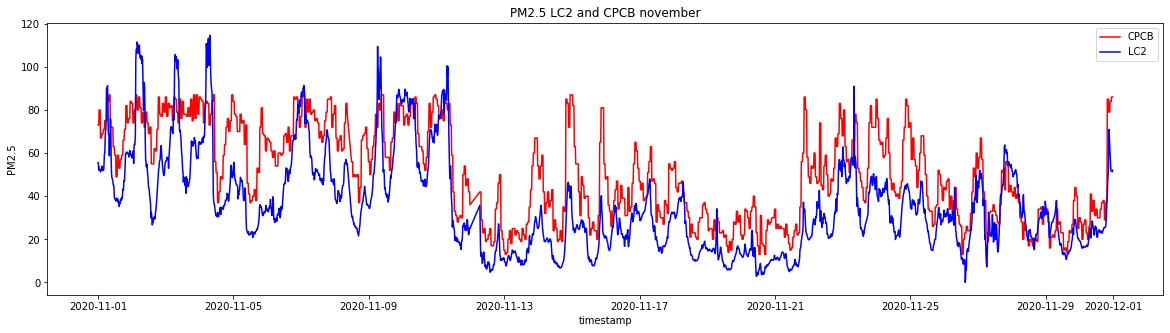

In [141]:
x = nov2['created_at']
y3 = nov2['PM2.5']
y4 = nov2['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3, 'r') 
plt.plot(x, y4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB november')
plt.show()

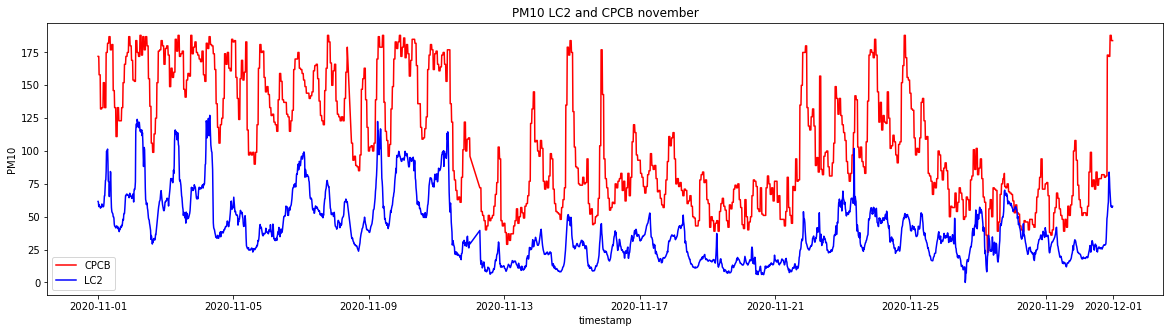

In [142]:
x = nov2['created_at']
y_3 = nov2['PM10']
y_4 = nov2['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_3, 'r') 
plt.plot(x, y_4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB november')
plt.show()

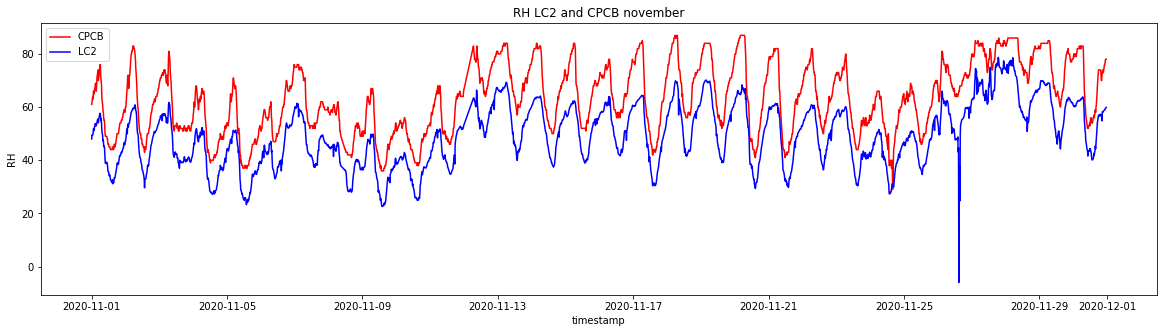

In [143]:
x = nov2['created_at']
y3_r = nov2['RH']
y4_r = nov2['RH_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["CPCB", 'LC2'])
plt.title('RH LC2 and CPCB november')
plt.show()

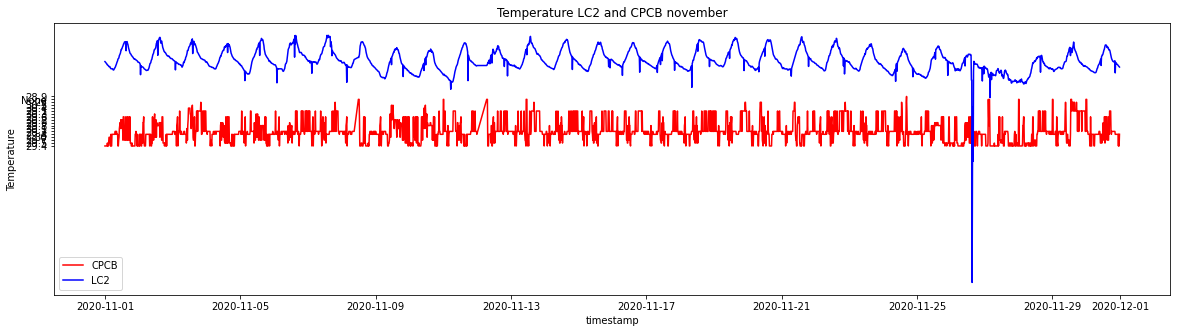

In [144]:
x = nov2['created_at']
y3_t = nov2['Temp']
y4_t = nov2['Temperature_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_t, 'r') 
plt.plot(x, y4_t, 'b') 
plt.xlabel('timestamp')
plt.ylabel('Temperature')
plt.legend(["CPCB", 'LC2'])
plt.title('Temperature LC2 and CPCB november')
plt.show()

max correlation is at lag 2
max correlation is  0.832
Pearsons correlation: 0.825
MSE:  392.6380951056338
MAE:  17.04955985915493
RMSE  19.815097655717818


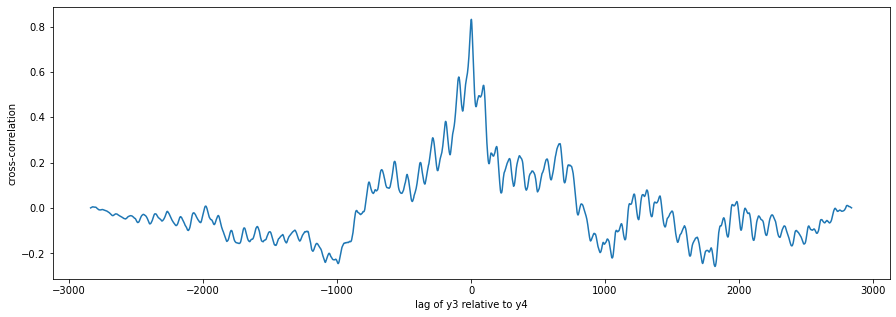

In [145]:
npts = len(nov2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y3 - y3.mean(), y4 - y4.mean(), mode='full')
ccor = ccov / (npts * y3.std() * y4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y3 relative to y4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y3, y4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov2['PM2.5_2'], nov2['PM2.5'])
MAE = mean_absolute_error(nov2['PM2.5_2'], nov2['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov2['PM2.5_2'], nov2['PM2.5'])))

max correlation is at lag 2
max correlation is  0.799
Pearsons correlation: 0.793
MSE:  5305.5985671126755
MAE:  66.1389295774648
RMSE  72.83953986065998


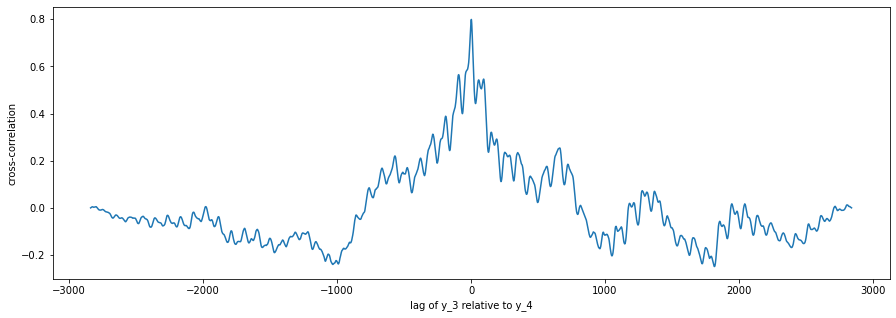

In [146]:
npts = len(nov2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_3 - y_3.mean(), y_4 - y_4.mean(), mode='full')
ccor = ccov / (npts * y_3.std() * y_4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_3 relative to y_4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_3, y_4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov2['PM10_2'], nov2['PM10'])
MAE = mean_absolute_error(nov2['PM10_2'], nov2['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov2['PM10_2'], nov2['PM10'])))

## Removing the values with RH > 75 in November

In [147]:
nov2_rh = nov2[nov2['RH_2'] < 75]

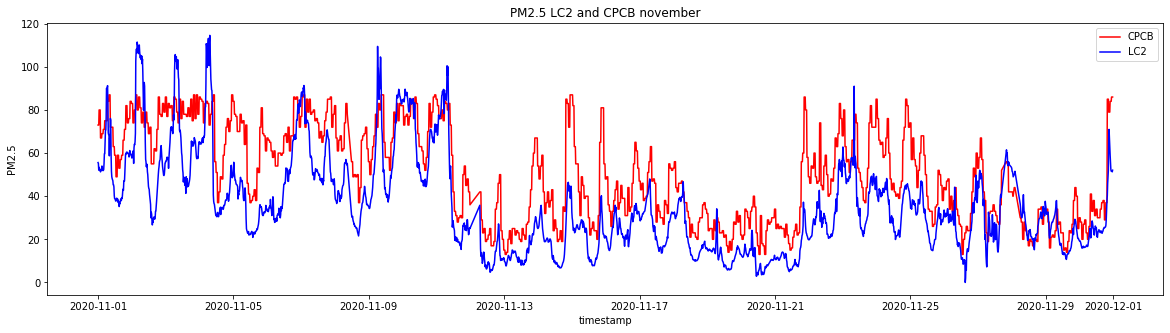

In [148]:
x = nov2_rh['created_at']
y33 = nov2_rh['PM2.5']
y44 = nov2_rh['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y33, 'r') 
plt.plot(x, y44, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB november')
plt.show()

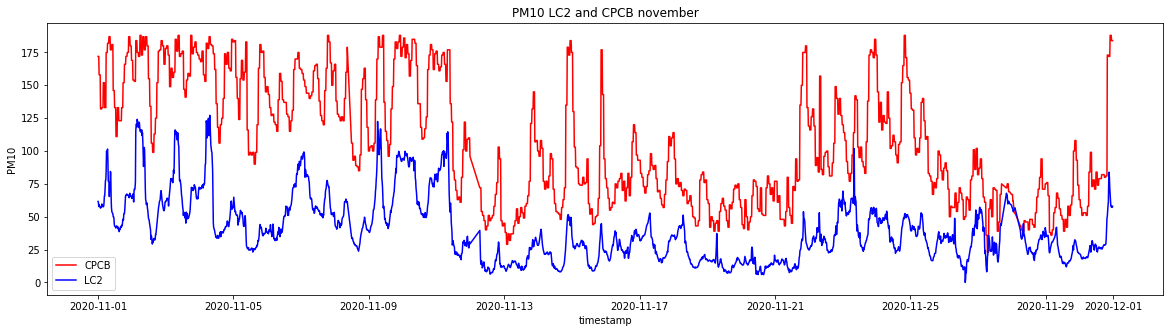

In [149]:
x = nov2_rh['created_at']
y3_3 = nov2_rh['PM10']
y4_4 = nov2_rh['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_3, 'r') 
plt.plot(x, y4_4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB november')
plt.show()

max correlation is at lag 2
max correlation is  0.836
Pearsons correlation: 0.831
MSE:  396.0945349358974
MAE:  17.150815527065525
RMSE  19.902123880025904


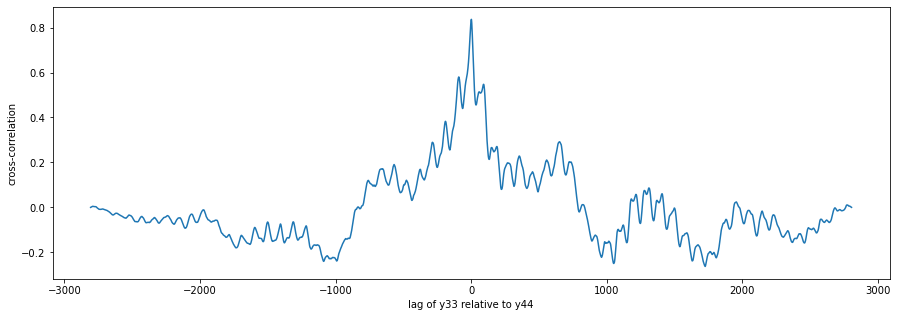

In [152]:
npts = len(nov2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y33 - y33.mean(), y44 - y44.mean(), mode='full')
ccor = ccov / (npts * y33.std() * y44.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y33 relative to y44')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y33, y44) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov2_rh['PM2.5_2'], nov2_rh['PM2.5'])
MAE = mean_absolute_error(nov2_rh['PM2.5_2'], nov2_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov2_rh['PM2.5_2'], nov2_rh['PM2.5'])))

max correlation is at lag 2
max correlation is  0.811
Pearsons correlation: 0.805
MSE:  396.0945349358974
MAE:  17.150815527065525
RMSE  19.902123880025904


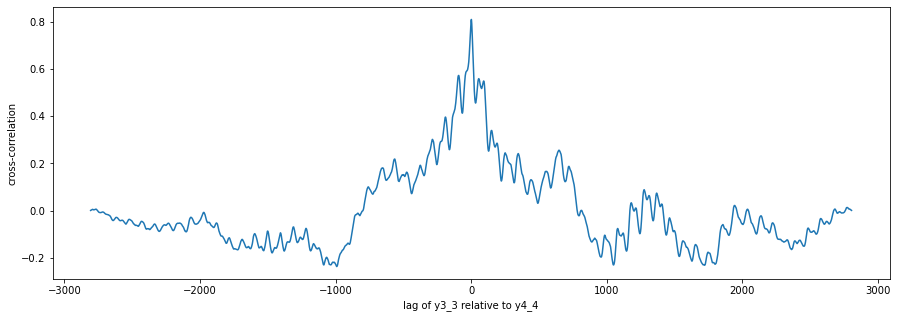

In [150]:
npts = len(nov2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y3_3 - y3_3.mean(), y4_4 - y4_4.mean(), mode='full')
ccor = ccov / (npts * y3_3.std() * y4_4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y3_3 relative to y4_4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y3_3, y4_4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov2_rh['PM10_2'], nov2_rh['PM10'])
MAE = mean_absolute_error(nov2_rh['PM10_2'], nov2_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov2_rh['PM10_2'], nov2_rh['PM10'])))

## December

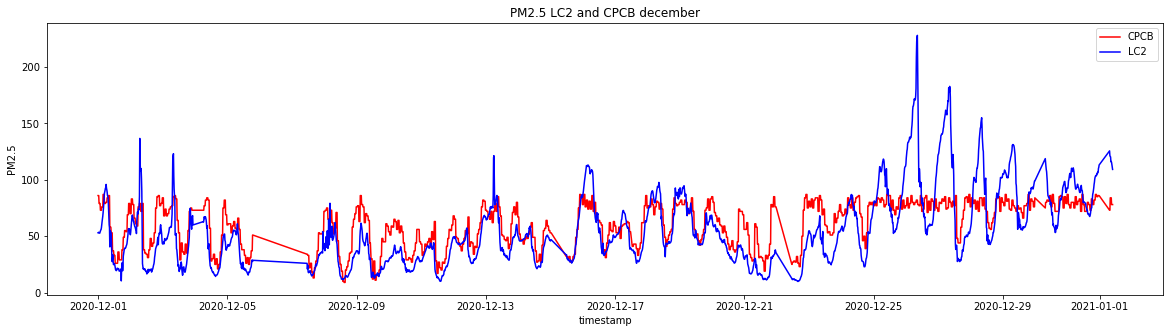

In [156]:
x = dec2['created_at']
y5 = dec2['PM2.5']
y6 = dec2['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5, 'r') 
plt.plot(x, y6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB december')
plt.show()

max correlation is at lag 1
max correlation is  0.732
Pearsons correlation: 0.730
MSE:  552.2740002994012
MAE:  17.73252245508982
RMSE  23.50051063912019


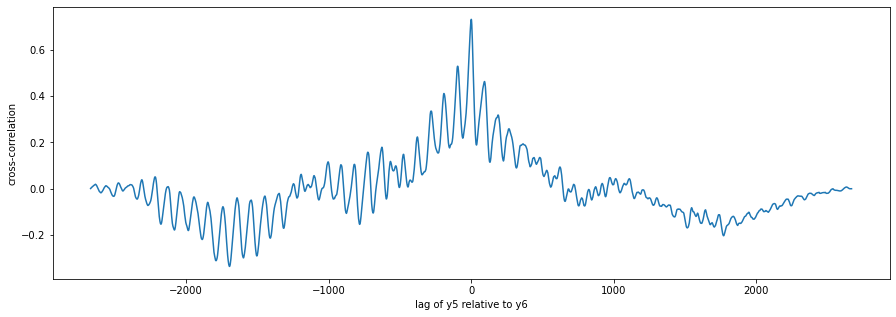

In [157]:
npts = len(dec2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y5 - y5.mean(), y6 - y6.mean(), mode='full')
ccor = ccov / (npts * y5.std() * y6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y5 relative to y6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y5, y6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec2['PM2.5_2'], dec2['PM2.5'])
MAE = mean_absolute_error(dec2['PM2.5_2'], dec2['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec2['PM2.5_2'], dec2['PM2.5'])))

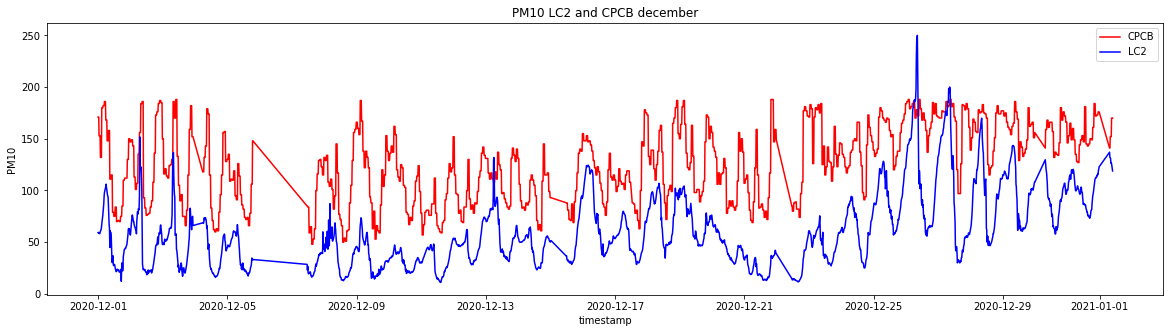

In [158]:
x = dec2['created_at']
y_5 = dec2['PM10']
y_6 = dec2['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_5, 'r') 
plt.plot(x, y_6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB december')
plt.show()

max correlation is at lag 2
max correlation is  0.71
Pearsons correlation: 0.706
MSE:  5009.566634356287
MAE:  65.54490269461077
RMSE  70.77829211245695


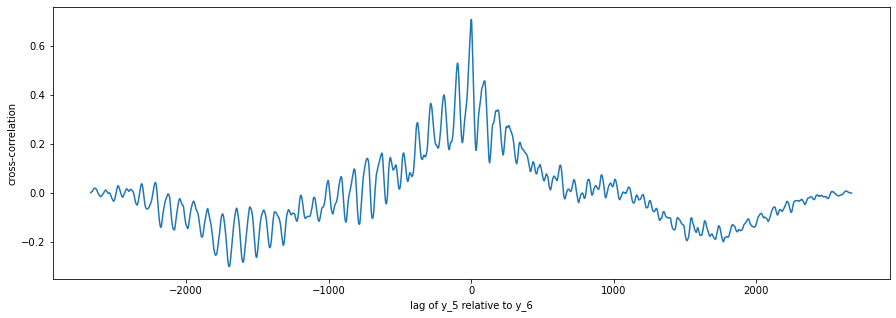

In [159]:
npts = len(dec2)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_5 - y_5.mean(), y_6 - y_6.mean(), mode='full')
ccor = ccov / (npts * y_5.std() * y_6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_5 relative to y_6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_5, y_6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec2['PM10_2'], dec2['PM10'])
MAE = mean_absolute_error(dec2['PM10_2'], dec2['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec2['PM10_2'], dec2['PM10'])))

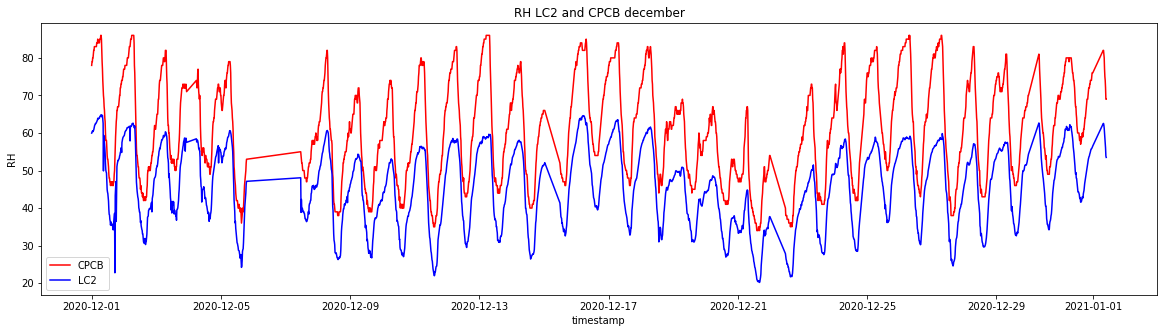

In [160]:
x = dec2['created_at']
y5_r = dec2['RH']
y6_r = dec2['RH_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5_r, 'r') 
plt.plot(x, y6_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["CPCB", 'LC2'])
plt.title('RH LC2 and CPCB december')
plt.show()

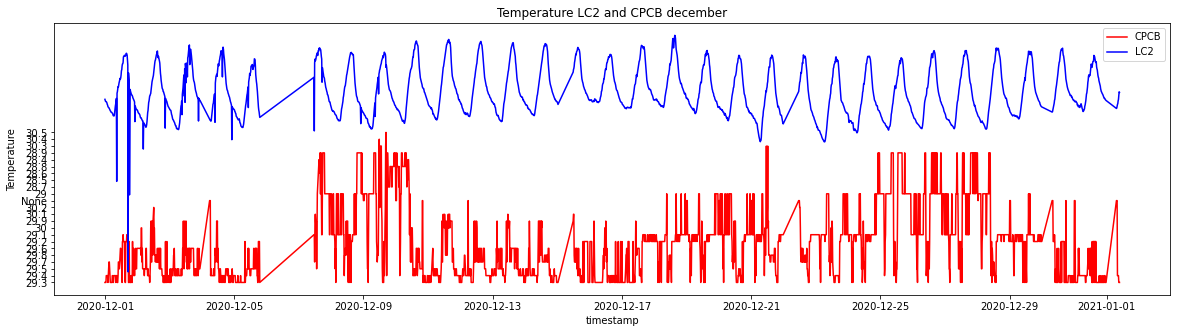

In [161]:
x = dec2['created_at']
y5_t = dec2['Temp']
y6_t = dec2['Temperature_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5_t, 'r') 
plt.plot(x, y6_t, 'b') 
plt.xlabel('timestamp')
plt.ylabel('Temperature')
plt.legend(["CPCB", 'LC2'])
plt.title('Temperature LC2 and CPCB december')
plt.show()

## Removing values RH > 75

In [162]:
dec2_rh = dec2[dec2['RH_2'] < 75]

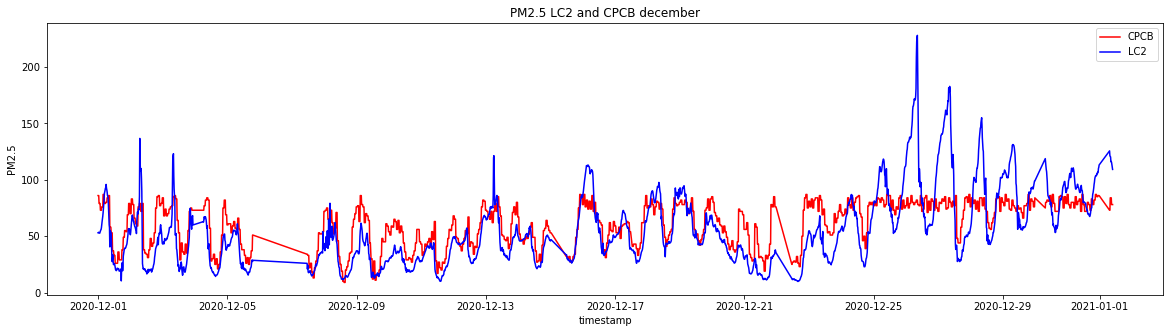

In [163]:
x = dec2_rh['created_at']
y55 = dec2_rh['PM2.5']
y66 = dec2_rh['PM2.5_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y55, 'r') 
plt.plot(x, y66, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC2'])
plt.title('PM2.5 LC2 and CPCB december')
plt.show()

max correlation is at lag 1
max correlation is  0.732
Pearsons correlation: 0.730
MSE:  552.2740002994012
MAE:  17.73252245508982
RMSE  23.50051063912019


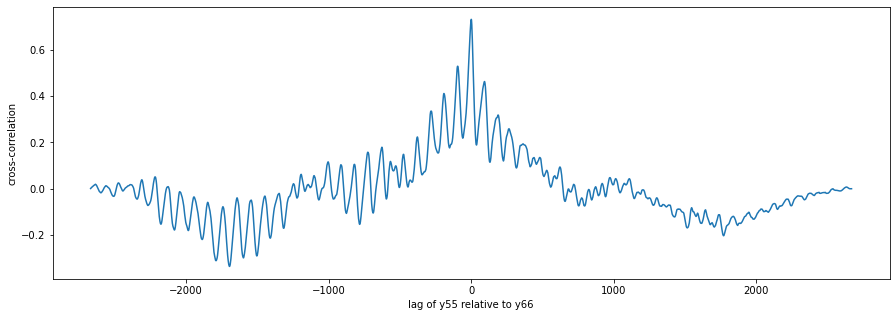

In [164]:
npts = len(dec2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y55 - y55.mean(), y66 - y66.mean(), mode='full')
ccor = ccov / (npts * y55.std() * y66.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y55 relative to y66')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y55, y66) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec2_rh['PM2.5_2'], dec2_rh['PM2.5'])
MAE = mean_absolute_error(dec2_rh['PM2.5_2'], dec2_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec2_rh['PM2.5_2'], dec2_rh['PM2.5'])))

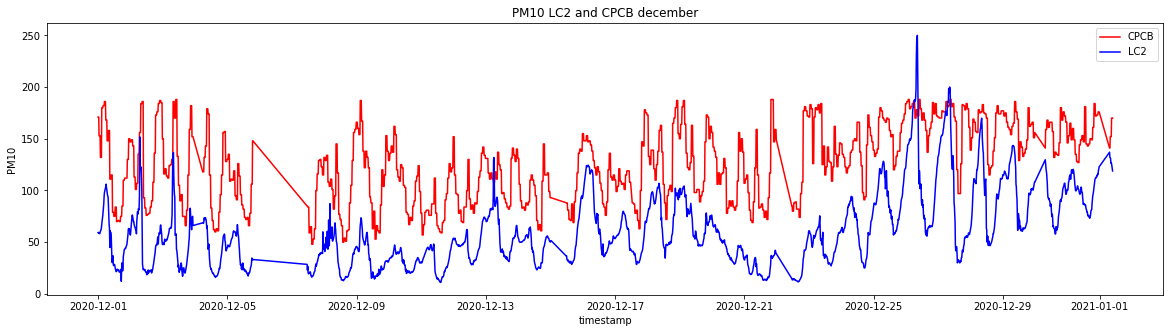

In [166]:
x = dec2_rh['created_at']
y5_5 = dec2_rh['PM10']
y6_6 = dec2_rh['PM10_2']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5_5, 'r') 
plt.plot(x, y6_6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC2'])
plt.title('PM10 LC2 and CPCB december')
plt.show()

max correlation is at lag 2
max correlation is  0.71
Pearsons correlation: 0.706
MSE:  5009.566634356287
MAE:  65.54490269461077
RMSE  70.77829211245695


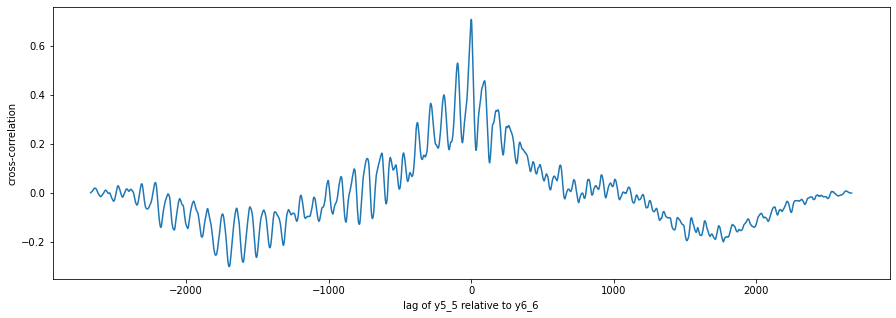

In [167]:
npts = len(dec2_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y5_5 - y5_5.mean(), y6_6 - y6_6.mean(), mode='full')
ccor = ccov / (npts * y5_5.std() * y6_6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y5_5 relative to y6_6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y5_5, y6_6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec2_rh['PM10_2'], dec2_rh['PM10'])
MAE = mean_absolute_error(dec2_rh['PM10_2'], dec2_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec2_rh['PM10_2'], dec2_rh['PM10'])))

## Node-3 with CPCB

In [168]:
oct3 = pd.merge(cpcb_oct, LC3,  
                   on='created_at',  
                   how='inner') 

In [169]:
oct3

created_at  PM10  PM2.5  RH  Temp   PM10_3  PM2.5_3   RH_3  \
0    2020-10-01 00:00:00    52     36  85    29    19.20    17.20  73.09   
1    2020-10-01 00:15:00    52     36  85    29    20.60    18.11  73.07   
2    2020-10-01 00:30:00    52     36  86    29    23.04    20.12  73.36   
3    2020-10-01 00:45:00    51     34  86    29    20.52    18.14  73.61   
4    2020-10-01 01:00:00    51     34  86  29.1    17.05    15.22  73.84   
...                  ...   ...    ...  ..   ...      ...      ...    ...   
2063 2020-10-31 22:30:00   172     73  61  29.5  1999.90   999.90  52.57   
2064 2020-10-31 22:45:00   179     86  61  29.5  1999.90   999.90  51.88   
2065 2020-10-31 23:00:00   179     86  60  29.4  1999.90   999.90  50.75   
2066 2020-10-31 23:15:00   179     86  59  29.4  1999.90   999.90  50.38   
2067 2020-10-31 23:30:00   179     86  59  29.5  1999.90   999.90  50.22   

      Temperature_3  
0             28.09  
1             27.94  
2             27.75  
3             27.62  
4             27.46  
...             ...  
2063          27.80  
2064          27.69  
2065          27.63  
2066          27.56  
2067          27.53  

[2068 rows x 9 columns]

In [170]:
nov3 = pd.merge(cpcb_nov, LC3, on = 'created_at', how = 'inner')

In [171]:
nov3

created_at  PM10  PM2.5  RH  Temp   PM10_3  PM2.5_3   RH_3  \
0    2020-11-01 00:00:00   172     73  61  29.4  1999.90   999.90  52.01   
1    2020-11-01 00:15:00   172     73  62  29.4  1999.90   999.90  53.73   
2    2020-11-01 00:30:00   172     73  63  29.4  1999.90   999.90  53.65   
3    2020-11-01 00:45:00   158     80  64  29.4  1999.90   999.90  54.05   
4    2020-11-01 01:00:00   158     80  63  29.4  1999.90   999.90  54.71   
...                  ...   ...    ...  ..   ...      ...      ...    ...   
2835 2020-11-30 22:30:00   188     84  76  29.3   118.95    76.65  63.57   
2836 2020-11-30 22:45:00   184     86  77  29.4   115.93    76.06  64.18   
2837 2020-11-30 23:00:00   184     86  78  29.3   115.49    76.41  64.57   
2838 2020-11-30 23:15:00   184     86  78  29.4   115.56    76.82  64.83   
2839 2020-11-30 23:30:00   184     86  78  29.3   116.72    78.21  65.06   

      Temperature_3  
0             27.15  
1             26.98  
2             26.69  
3             26.52  
4             26.39  
...             ...  
2835          26.09  
2836          25.87  
2837          25.68  
2838          25.56  
2839          25.40  

[2840 rows x 9 columns]

In [172]:
dec3 = pd.merge(cpcb_dec, LC3, on = 'created_at', how = 'inner')
dec3

created_at  PM10  PM2.5  RH  Temp  PM10_3  PM2.5_3   RH_3  \
0    2020-12-01 00:00:00   171     86  78  29.3  121.58    80.95  65.37   
1    2020-12-01 00:15:00   171     86  79  29.3  120.63    82.31  65.58   
2    2020-12-01 00:30:00   171     86  79  29.3  114.34    81.63  65.66   
3    2020-12-01 00:45:00   153     79  80  29.3  114.85    83.21  66.02   
4    2020-12-01 01:00:00   153     79  80  29.4  113.19    83.78  66.14   
...                  ...   ...    ...  ..   ...     ...      ...    ...   
2669 2021-01-01 08:30:00   152     84  75  29.4  252.13   191.94  64.82   
2670 2021-01-01 08:45:00   170     78  74  29.4  244.42   188.25  63.08   
2671 2021-01-01 09:00:00   170     78  72  29.3  232.97   181.74  61.34   
2672 2021-01-01 09:15:00   170     78  69  29.3  225.40   175.82  58.68   
2673 2021-01-01 09:30:00   170     78  69  29.3  222.83   172.91  57.42   

      Temperature_3  
0             25.14  
1             25.01  
2             24.93  
3             24.81  
4             24.72  
...             ...  
2669          24.72  
2670          25.12  
2671          25.71  
2672          26.24  
2673          26.45  

[2674 rows x 9 columns]

## October Node-3

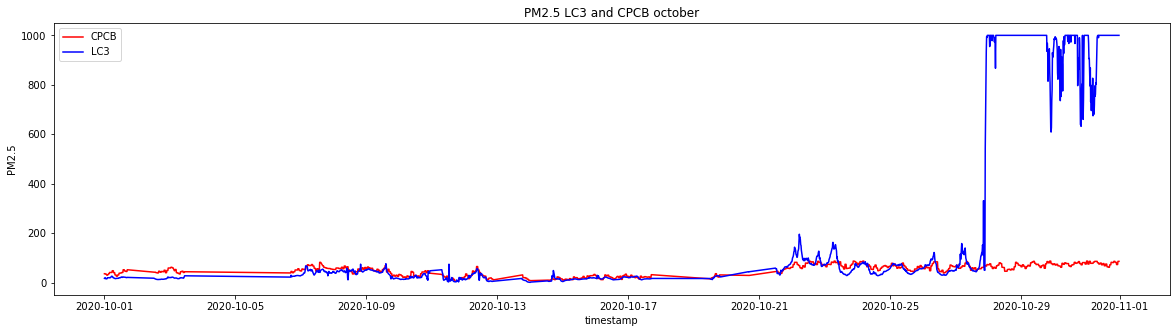

In [186]:
x = oct3['created_at']
y1 = oct3['PM2.5']
y2 = oct3['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB october')
plt.show()

In [187]:
# calculate summary statistics
lc3_mean, lc3_std = np.mean(oct3['PM2.5_3']), np.std(oct3['PM2.5_3'])

# identify outliers
cut_off = lc3_std * 3
lower, upper = lc3_mean - cut_off, lc3_mean + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
print("mean and standard deviation: ", lc3_mean, lc3_std)
#identifying outliers
outliers = [x for x in oct3['PM2.5_3'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in oct3['PM2.5_3']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
oct3_1  = oct3[oct3['PM2.5_3'] > lower]
oct3_2 = oct3_1[oct3['PM2.5_3'] < upper] 

cut off:  1089.4419399002636
lower and upper boundaries:  -874.22 1304.66
mean and standard deviation:  215.22119922630634 363.14731330008783
Identified outliers: 0
Non-outlier observations: 2068


In [188]:
# calculate interquartile range
q25, q75 = np.percentile(oct3['PM2.5_3'], 25), np.percentile(oct3['PM2.5_3'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
#identifying outliers
outliers = [x for x in oct3['PM2.5_3'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in oct3['PM2.5_3']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
print("q25,q75 ", q25, q75)
oct3_1 = oct3[oct3['PM2.5_3'] < upper]


cut off:  105.08250000000001
lower and upper boundaries:  -85.4 194.82
Identified outliers: 395
Non-outlier observations: 1673
q25,q75  19.677500000000002 89.7325


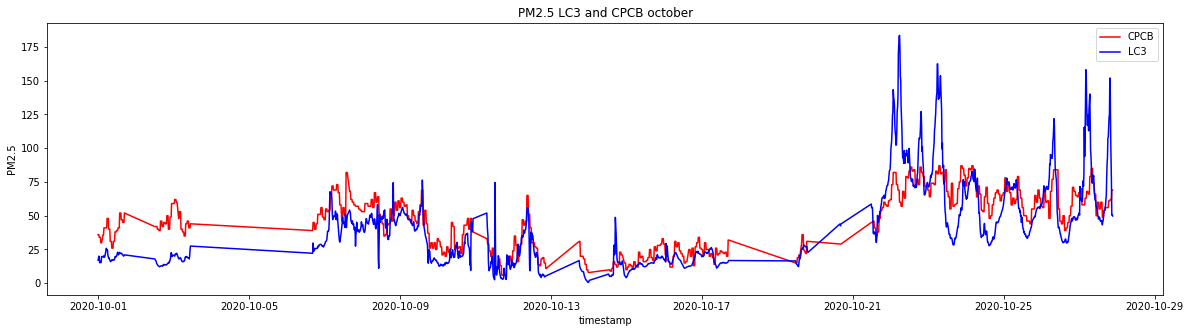

In [189]:
x = oct3_1['created_at']
y1 = oct3_1['PM2.5']
y2 = oct3_1['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1, 'r') 
plt.plot(x, y2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB october')
plt.show()

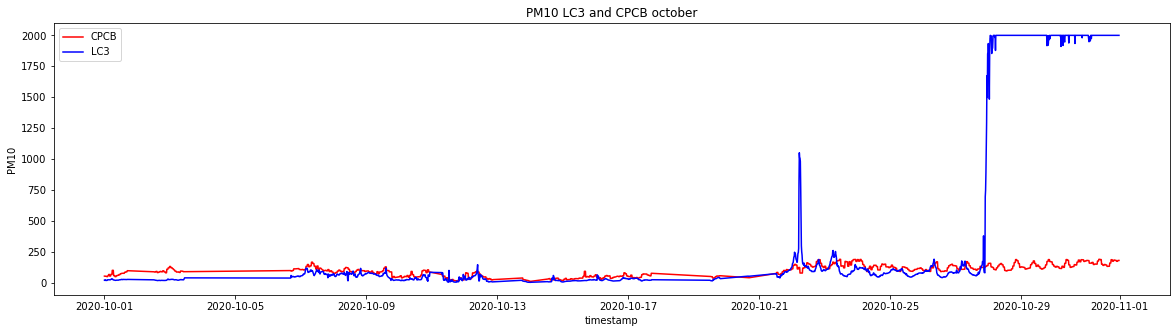

In [190]:
x = oct3['created_at']
y_1 = oct3['PM10']
y_2 = oct3['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_1, 'r') 
plt.plot(x, y_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB october')
plt.show()

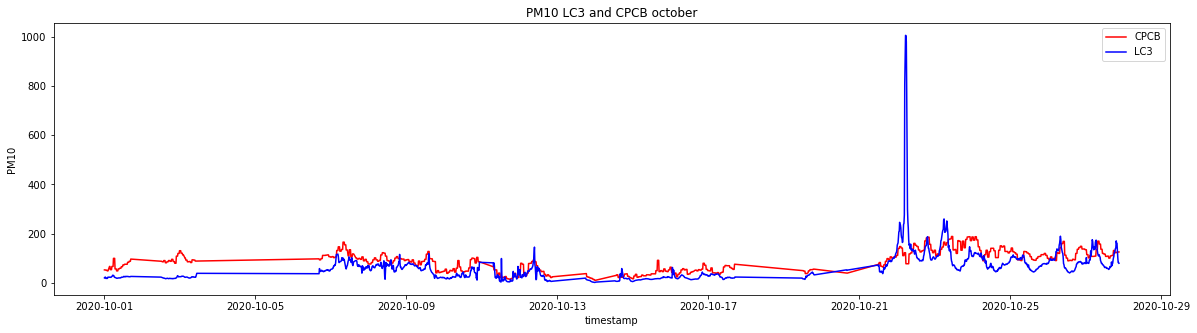

In [191]:
x = oct3_1['created_at']
y_1 = oct3_1['PM10']
y_2 = oct3_1['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_1, 'r') 
plt.plot(x, y_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB october')
plt.show()

max correlation is at lag 4
max correlation is  0.784
Pearsons correlation: 0.774
MSE PM2.5:  399.71078296473405
MAE PM2.5:  14.462396891811117
RMSE PM2.5:  19.992768266669177


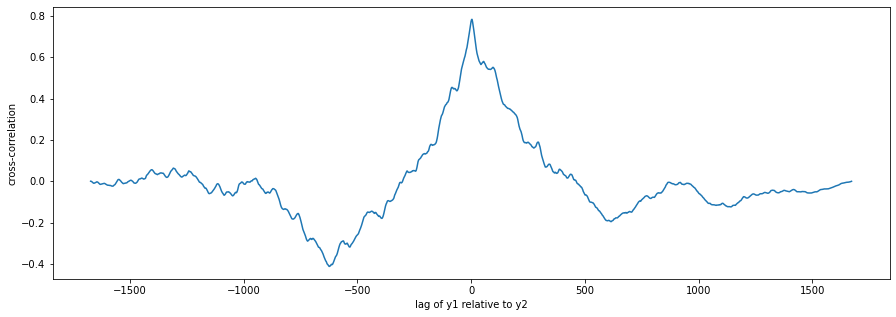

In [192]:
npts = len(oct3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (npts * y1.std() * y2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1 relative to y2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1, y2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct3_1['PM2.5_3'], oct3_1['PM2.5'])
MAE = mean_absolute_error(oct3_1['PM2.5_3'], oct3_1['PM2.5'])
print("MSE PM2.5: ", MSE)
print("MAE PM2.5: ", MAE)
print("RMSE PM2.5: ", np.sqrt(mean_squared_error(oct3_1['PM2.5_3'], oct3_1['PM2.5'])))

max correlation is at lag 55
max correlation is  0.516
Pearsons correlation: 0.499
MSE PM10:  4030.4021991034074
MAE PM10:  38.44361625821877
RMSE PM10:  63.48544871939874


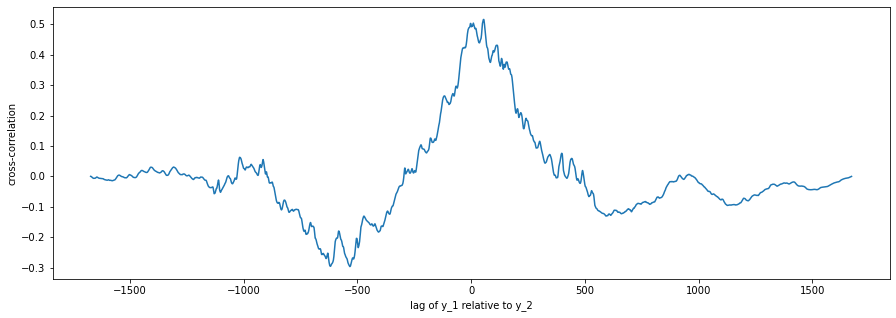

In [195]:
npts = len(oct3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_1 - y_1.mean(), y_2 - y_2.mean(), mode='full')
ccor = ccov / (npts * y_1.std() * y_2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_1 relative to y_2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_1, y_2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct3_1['PM10_3'], oct3_1['PM10'])
MAE = mean_absolute_error(oct3_1['PM10_3'], oct3_1['PM10'])
print("MSE PM10: ", MSE)
print("MAE PM10: ", MAE)
print("RMSE PM10: ", np.sqrt(mean_squared_error(oct3_1['PM10_3'], oct3_1['PM10'])))

## Removing values RH > 75

In [183]:
oct3_rh = oct3_1[oct3_1['RH_3'] < 75]

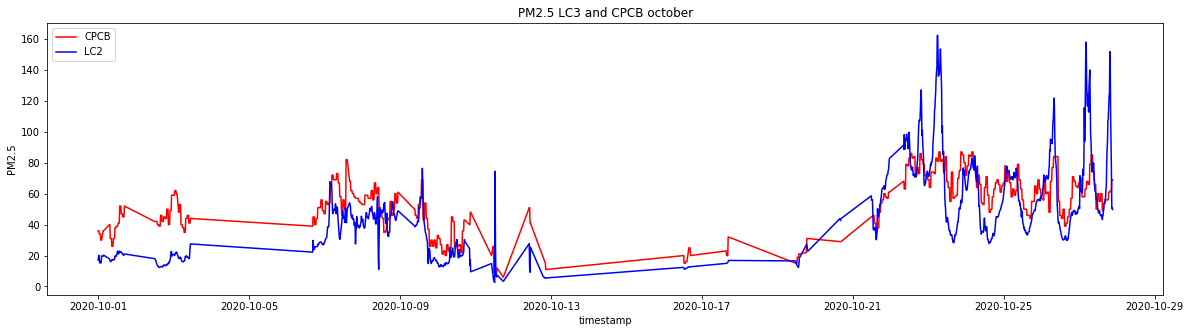

In [184]:
x = oct3_rh['created_at']
y11 = oct3_rh['PM2.5']
y22 = oct3_rh['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y11, 'r') 
plt.plot(x, y22, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB october')
plt.show()

max correlation is at lag 4
max correlation is  0.754
Pearsons correlation: 0.730
MSE:  444.9445148082069
MAE:  16.591605709188222
RMSE  21.093707943560016


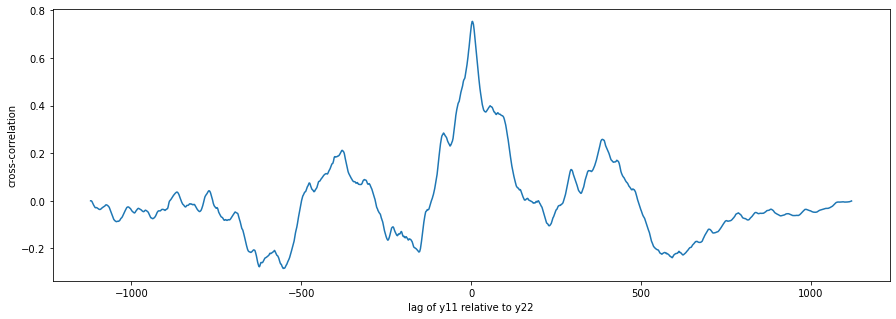

In [185]:
npts = len(oct3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y11 - y11.mean(), y22 - y22.mean(), mode='full')
ccor = ccov / (npts * y11.std() * y22.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y11 relative to y22')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y11, y22) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct3_rh['PM2.5_3'], oct3_rh['PM2.5'])
MAE = mean_absolute_error(oct3_rh['PM2.5_3'], oct3_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(oct3_rh['PM2.5_3'], oct3_rh['PM2.5'])))

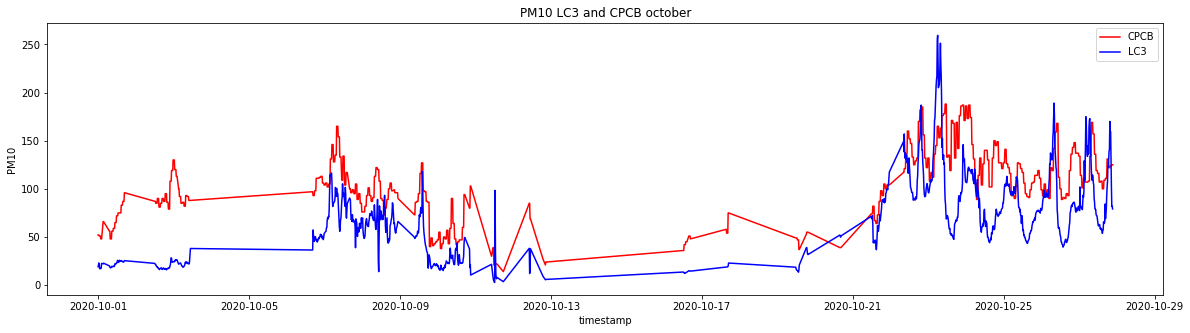

In [197]:
x = oct3_rh['created_at']
y1_1 = oct3_rh['PM10']
y2_2 = oct3_rh['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y1_1, 'r') 
plt.plot(x, y2_2, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB october')
plt.show()

max correlation is at lag 4
max correlation is  0.717
Pearsons correlation: 0.689
MSE:  2290.8420966101694
MAE:  41.69403211418376
RMSE  47.86274225961326


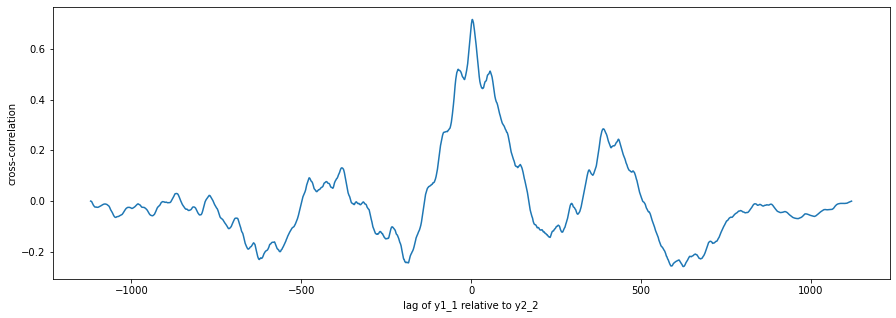

In [198]:
npts = len(oct3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y1_1 - y1_1.mean(), y2_2 - y2_2.mean(), mode='full')
ccor = ccov / (npts * y1_1.std() * y2_2.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y1_1 relative to y2_2')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y1_1, y2_2) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(oct3_rh['PM10_3'], oct3_rh['PM10'])
MAE = mean_absolute_error(oct3_rh['PM10_3'], oct3_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(oct3_rh['PM10_3'], oct3_rh['PM10'])))

## November

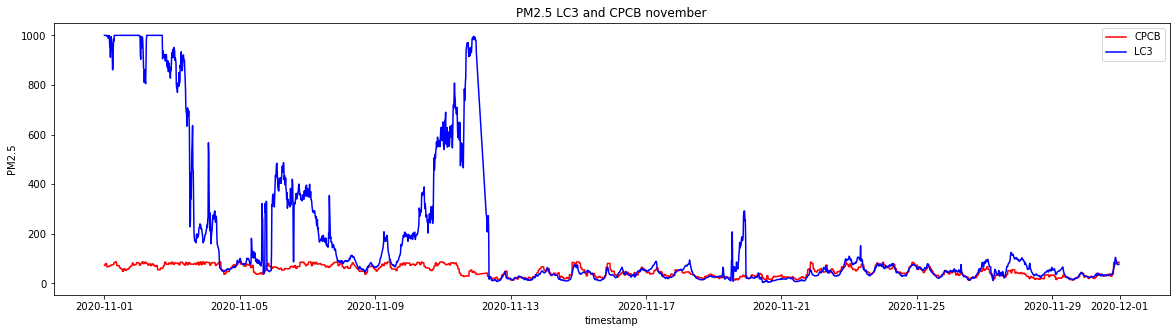

In [199]:
x = nov3['created_at']
y3 = nov3['PM2.5']
y4 = nov3['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3, 'r') 
plt.plot(x, y4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB november')
plt.show()

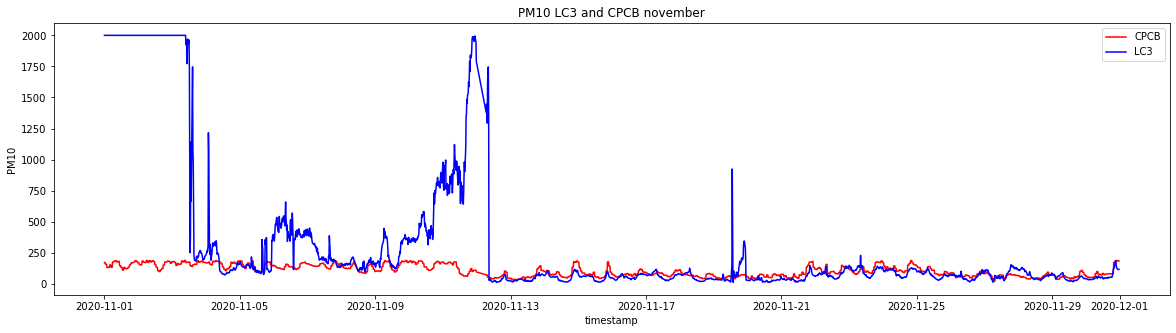

In [203]:
x = nov3['created_at']
y_3 = nov3['PM10']
y_4 = nov3['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_3, 'r') 
plt.plot(x, y_4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB november')
plt.show()

In [200]:
# calculate interquartile range
q25, q75 = np.percentile(nov3['PM2.5_3'], 25), np.percentile(nov3['PM2.5_3'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
#identifying outliers
outliers = [x for x in nov3['PM2.5_3'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in nov3['PM2.5_3']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
print("q25,q75 ", q25, q75)
nov3_1 = nov3[nov3['PM2.5_3'] < upper]


cut off:  212.7075
lower and upper boundaries:  -181.19 386.03
Identified outliers: 409
Non-outlier observations: 2431
q25,q75  31.52 173.32500000000002


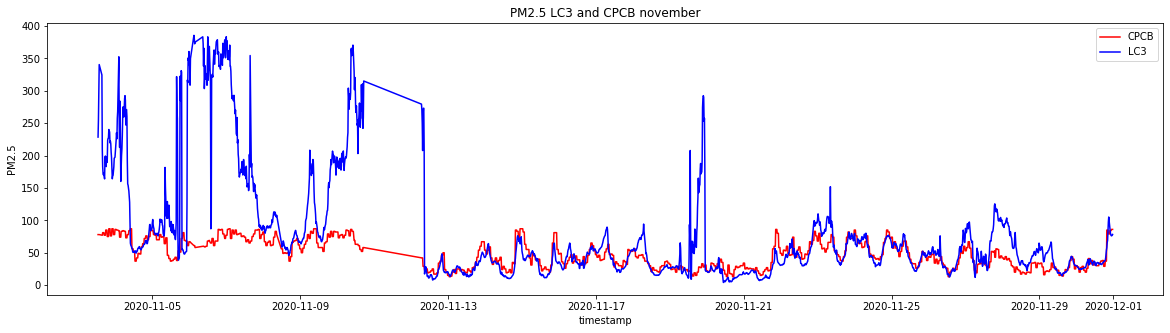

In [202]:
x = nov3_1['created_at']
y3 = nov3_1['PM2.5']
y4 = nov3_1['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3, 'r') 
plt.plot(x, y4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB november')
plt.show()

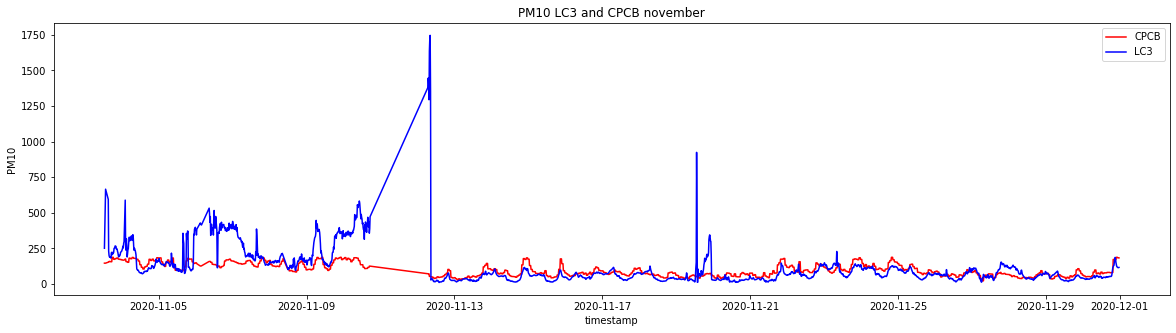

In [204]:
x = nov3_1['created_at']
y_3 = nov3_1['PM10']
y_4 = nov3_1['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_3, 'r') 
plt.plot(x, y_4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB november')
plt.show()

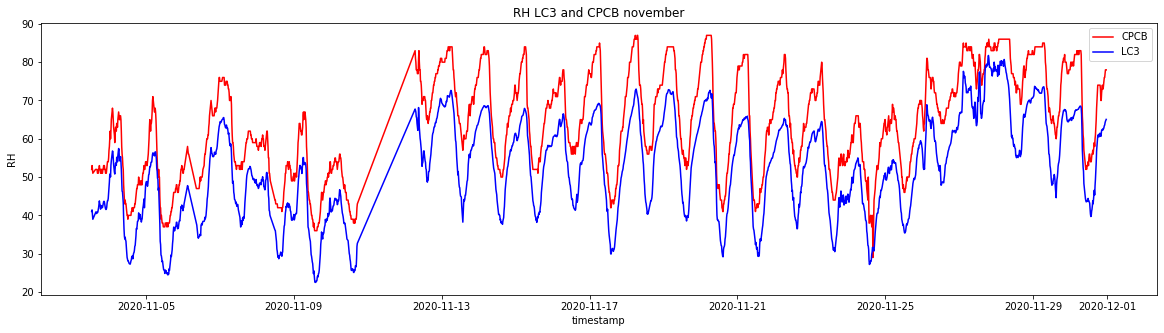

In [213]:
x = nov3_1['created_at']
y3_r = nov3_1['RH']
y4_r = nov3_1['RH_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_r, 'r') 
plt.plot(x, y4_r, 'b') 
plt.xlabel('timestamp')
plt.ylabel('RH')
plt.legend(["CPCB", 'LC3'])
plt.title('RH LC3 and CPCB november')
plt.show()

max correlation is at lag 3
max correlation is  0.605
Pearsons correlation: 0.603
MSE:  5733.646408185931
MAE:  37.467679967091726
RMSE  75.72084526856479


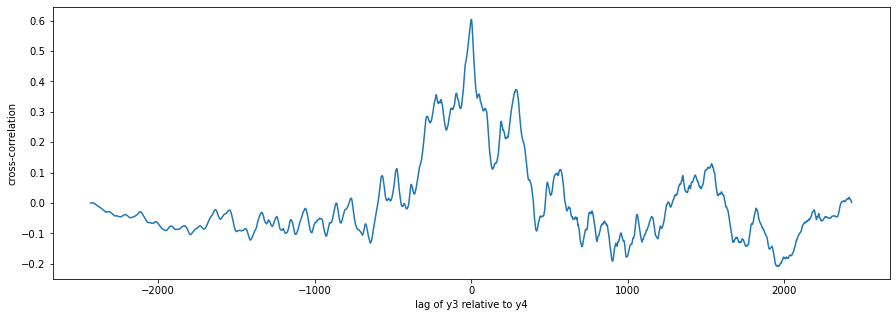

In [207]:
npts = len(nov3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y3 - y3.mean(), y4 - y4.mean(), mode='full')
ccor = ccov / (npts * y3.std() * y4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y3 relative to y4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y3, y4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov3_1['PM2.5_3'], nov3_1['PM2.5'])
MAE = mean_absolute_error(nov3_1['PM2.5_3'], nov3_1['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov3_1['PM2.5_3'], nov3_1['PM2.5'])))

max correlation is at lag -7
max correlation is  0.505
Pearsons correlation: 0.500
MSE:  14145.508758083097
MAE:  56.11459070341424
RMSE  118.93489293761985


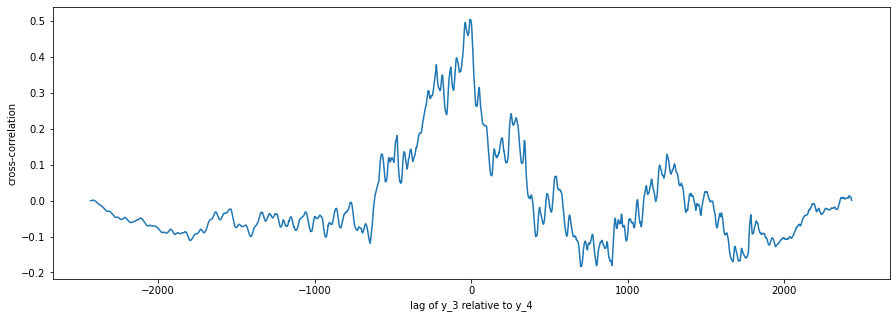

In [209]:
npts = len(nov3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_3 - y_3.mean(), y_4 - y_4.mean(), mode='full')
ccor = ccov / (npts * y_3.std() * y_4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_3 relative to y_4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_3, y_4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov3_1['PM10_3'], nov3_1['PM10'])
MAE = mean_absolute_error(nov3_1['PM10_3'], nov3_1['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov3_1['PM10_3'], nov3_1['PM10'])))

## Removing values RH > 75 in November

In [211]:
nov3_rh = nov3_1[nov3_1['RH_3'] < 75]

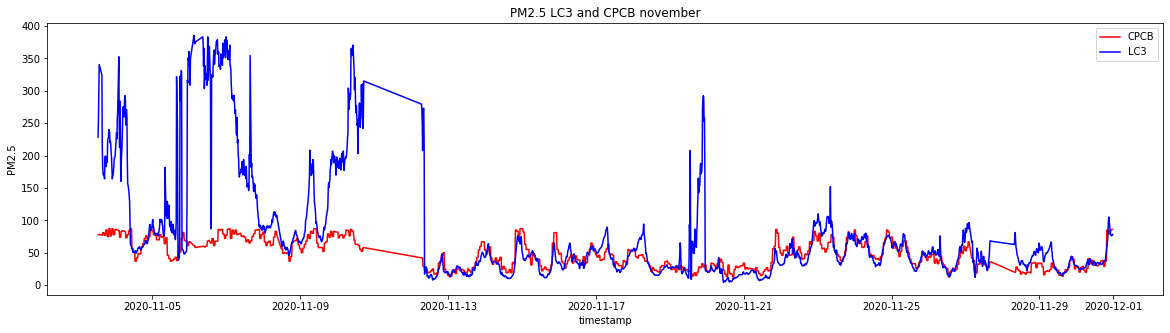

In [212]:
x = nov3_rh['created_at']
y33 = nov3_rh['PM2.5']
y44 = nov3_rh['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y33, 'r') 
plt.plot(x, y44, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB november')
plt.show()

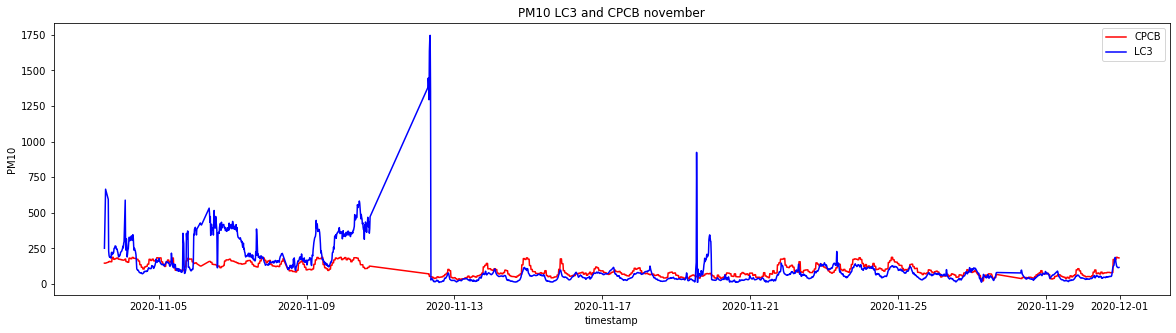

In [214]:
x = nov3_rh['created_at']
y3_3 = nov3_rh['PM10']
y4_4 = nov3_rh['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y3_3, 'r') 
plt.plot(x, y4_4, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB november')
plt.show()

max correlation is at lag 3
max correlation is  0.606
Pearsons correlation: 0.604
MSE:  5832.483271253176
MAE:  37.22339119390347
RMSE  76.37069641723308


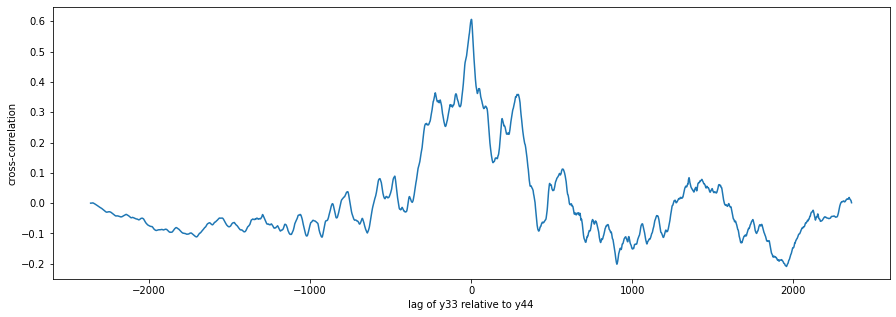

In [216]:
npts = len(nov3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y33 - y33.mean(), y44 - y44.mean(), mode='full')
ccor = ccov / (npts * y33.std() * y44.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y33 relative to y44')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y33, y44) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov3_rh['PM2.5_3'], nov3_rh['PM2.5'])
MAE = mean_absolute_error(nov3_rh['PM2.5_3'], nov3_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov3_rh['PM2.5_3'], nov3_rh['PM2.5'])))

max correlation is at lag -7
max correlation is  0.509
Pearsons correlation: 0.504
MSE:  14481.803130990684
MAE:  56.366909398814556
RMSE  120.34036368147922


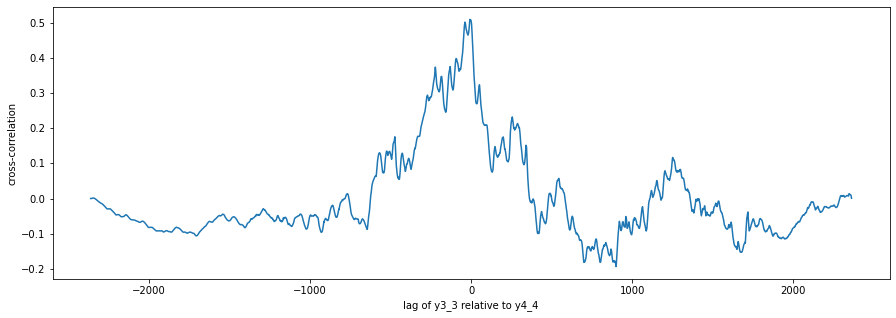

In [217]:
npts = len(nov3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y3_3 - y3_3.mean(), y4_4 - y4_4.mean(), mode='full')
ccor = ccov / (npts * y3_3.std() * y4_4.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y3_3 relative to y4_4')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y3_3, y4_4) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(nov3_rh['PM10_3'], nov3_rh['PM10'])
MAE = mean_absolute_error(nov3_rh['PM10_3'], nov3_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(nov3_rh['PM10_3'], nov3_rh['PM10'])))

## December

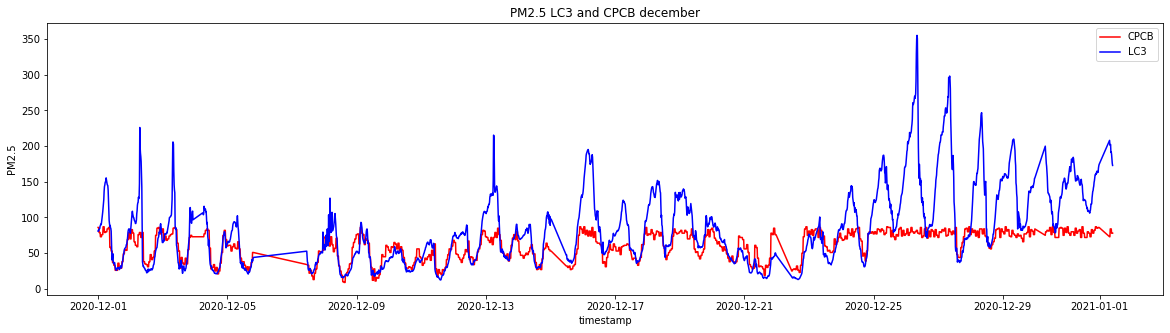

In [218]:
x = dec3['created_at']
y5 = dec3['PM2.5']
y6 = dec3['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5, 'r') 
plt.plot(x, y6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB december')
plt.show()

max correlation is at lag 1
max correlation is  0.721
Pearsons correlation: 0.720
MSE:  2285.816242670157
MAE:  30.734267015706802
RMSE  47.810210652852774


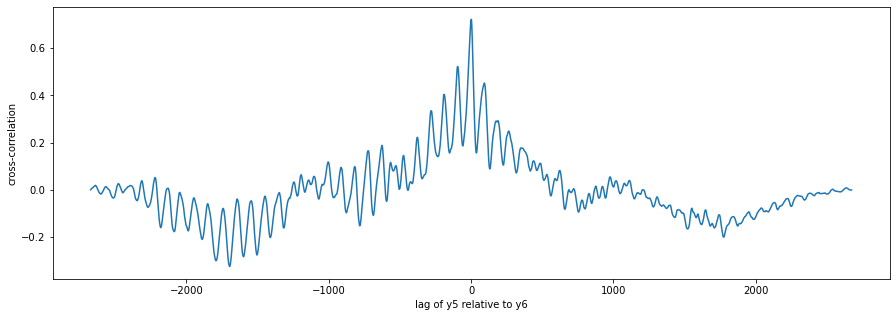

In [219]:
npts = len(dec3)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y5 - y5.mean(), y6 - y6.mean(), mode='full')
ccor = ccov / (npts * y5.std() * y6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y5 relative to y6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y5, y6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3['PM2.5_3'], dec3['PM2.5'])
MAE = mean_absolute_error(dec3['PM2.5_3'], dec3['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3['PM2.5_3'], dec3['PM2.5'])))

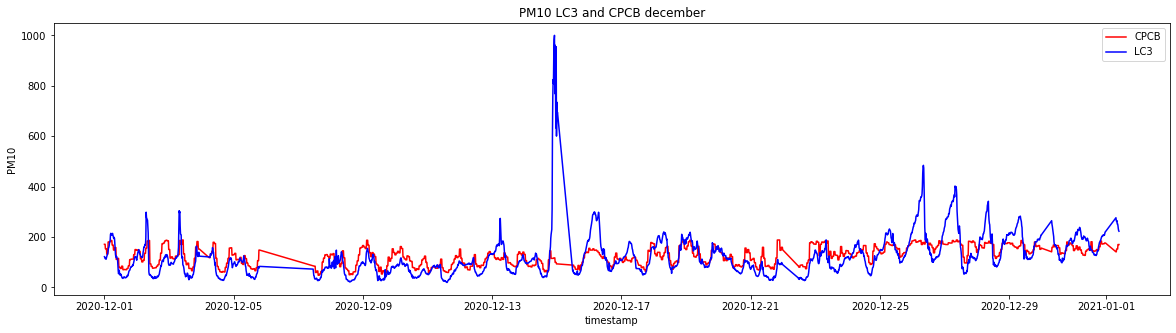

In [220]:
x = dec3['created_at']
y_5 = dec3['PM10']
y_6 = dec3['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_5, 'r') 
plt.plot(x, y_6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB december')
plt.show()

max correlation is at lag 2
max correlation is  0.546
Pearsons correlation: 0.543
MSE:  5442.939496035901
MAE:  42.11280478683619
RMSE  73.77628003658019


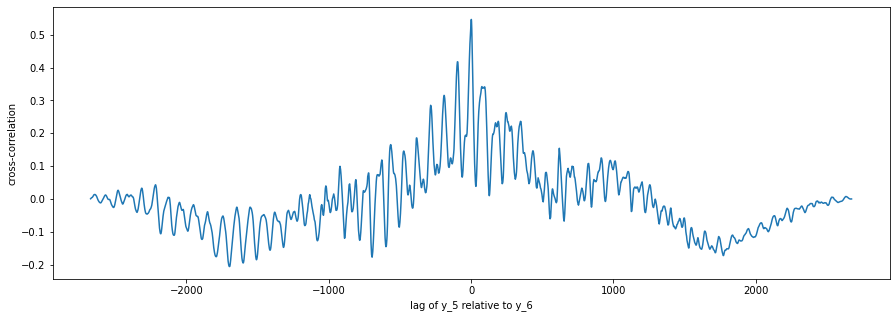

In [221]:
npts = len(dec3)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_5 - y_5.mean(), y_6 - y_6.mean(), mode='full')
ccor = ccov / (npts * y_5.std() * y_6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_5 relative to y_6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_5, y_6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3['PM10_3'], dec3['PM10'])
MAE = mean_absolute_error(dec3['PM10_3'], dec3['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3['PM10_3'], dec3['PM10'])))

In [222]:
# calculate interquartile range
q25, q75 = np.percentile(dec3['PM2.5_3'], 25), np.percentile(dec3['PM2.5_3'], 75)
iqr = q75 - q25
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print("cut off: ", cut_off)
print("lower and upper boundaries: ", round(lower, 2), round(upper,2))
#identifying outliers
outliers = [x for x in dec3['PM2.5_3'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in dec3['PM2.5_3']if x > lower and x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))
print("q25,q75 ", q25, q75)
dec3_1 = dec3[dec3['PM2.5_3'] < upper]


cut off:  106.7475
lower and upper boundaries:  -63.84 220.82
Identified outliers: 51
Non-outlier observations: 2623
q25,q75  42.9075 114.0725


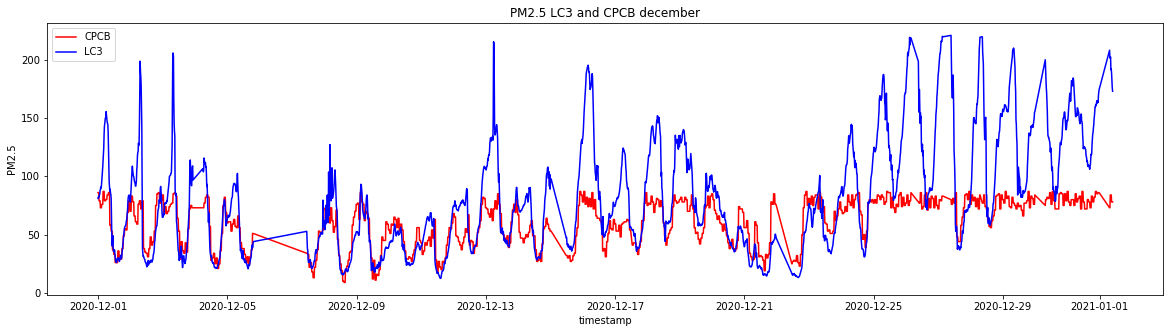

In [223]:
x = dec3_1['created_at']
y5 = dec3_1['PM2.5']
y6 = dec3_1['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5, 'r') 
plt.plot(x, y6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB december')
plt.show()

max correlation is at lag 1
max correlation is  0.753
Pearsons correlation: 0.751
MSE:  1661.5459353412125
MAE:  27.78276019824628
RMSE  40.76206490526716


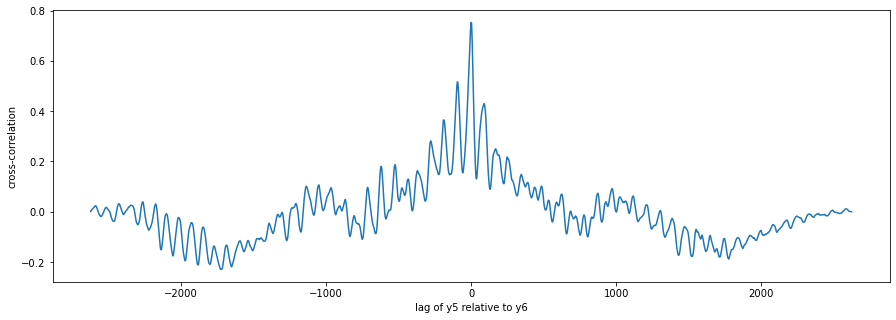

In [224]:
npts = len(dec3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y5 - y5.mean(), y6 - y6.mean(), mode='full')
ccor = ccov / (npts * y5.std() * y6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y5 relative to y6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y5, y6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3_1['PM2.5_3'], dec3_1['PM2.5'])
MAE = mean_absolute_error(dec3_1['PM2.5_3'], dec3_1['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3_1['PM2.5_3'], dec3_1['PM2.5'])))

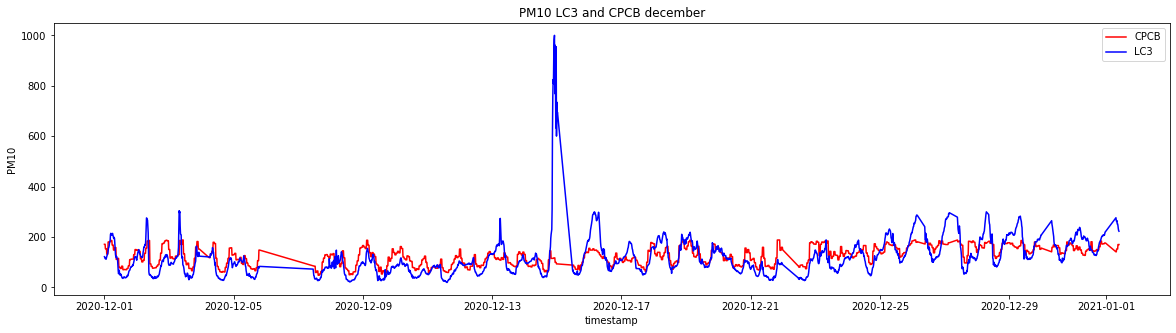

In [225]:
x = dec3_1['created_at']
y_5 = dec3_1['PM10']
y_6 = dec3_1['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y_5, 'r') 
plt.plot(x, y_6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB december')
plt.show()

max correlation is at lag 2
max correlation is  0.52
Pearsons correlation: 0.516
MSE:  4916.562578879146
MAE:  39.54390392680138
RMSE  70.11820433296296


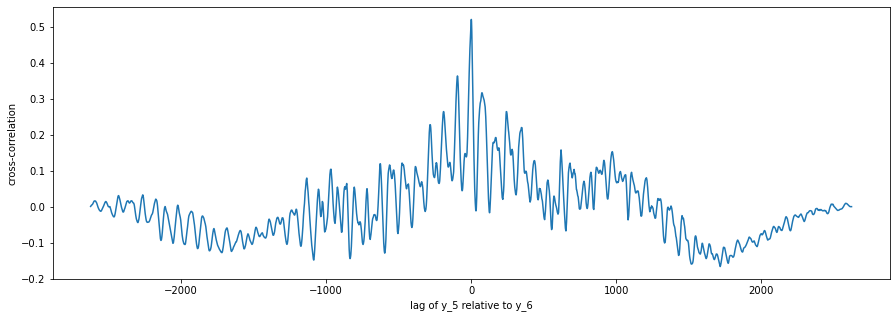

In [226]:
npts = len(dec3_1)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y_5 - y_5.mean(), y_6 - y_6.mean(), mode='full')
ccor = ccov / (npts * y_5.std() * y_6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y_5 relative to y_6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y_5, y_6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3_1['PM10_3'], dec3_1['PM10'])
MAE = mean_absolute_error(dec3_1['PM10_3'], dec3_1['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3_1['PM10_3'], dec3_1['PM10'])))

## Removing values RH > 75

In [228]:
dec3_rh = dec3[dec3['RH_3'] < 75]

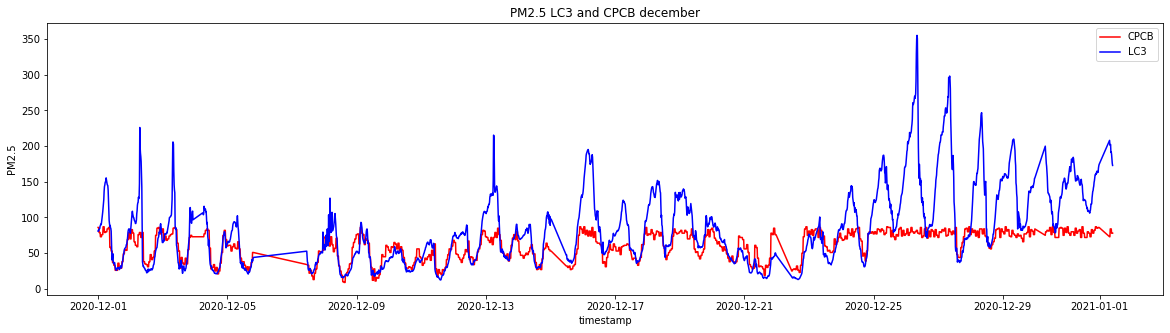

In [229]:
x = dec3_rh['created_at']
y55 = dec3_rh['PM2.5']
y66 = dec3_rh['PM2.5_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y55, 'r') 
plt.plot(x, y66, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM2.5')
plt.legend(["CPCB", 'LC3'])
plt.title('PM2.5 LC3 and CPCB december')
plt.show()

max correlation is at lag 1
max correlation is  0.721
Pearsons correlation: 0.720
MSE:  2285.816242670157
MAE:  30.734267015706802
RMSE  47.810210652852774


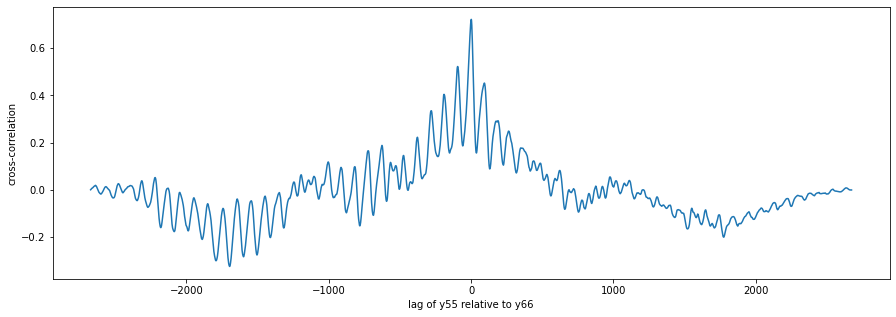

In [230]:
npts = len(dec3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y55 - y55.mean(), y66 - y66.mean(), mode='full')
ccor = ccov / (npts * y55.std() * y66.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y55 relative to y66')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y55, y66) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3_rh['PM2.5_3'], dec3_rh['PM2.5'])
MAE = mean_absolute_error(dec3_rh['PM2.5_3'], dec3_rh['PM2.5'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3_rh['PM2.5_3'], dec3_rh['PM2.5'])))

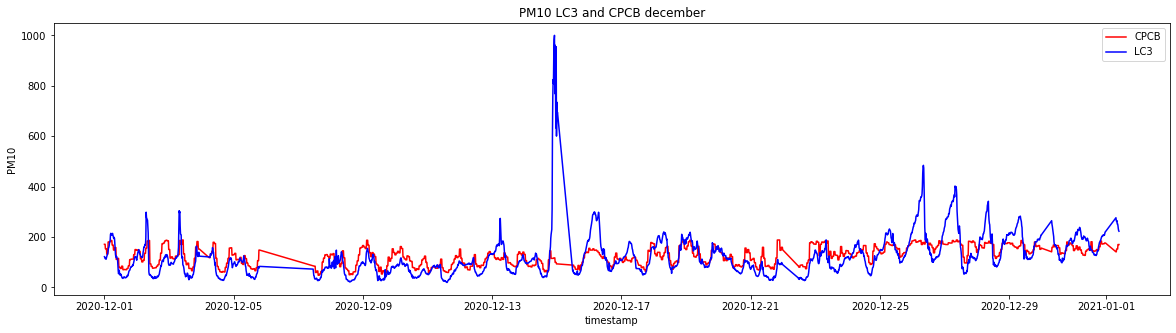

In [231]:
x = dec3_rh['created_at']
y5_5 = dec3_rh['PM10']
y6_6 = dec3_rh['PM10_3']
fig= plt.figure(figsize=(20,5))
plt.plot(x, y5_5, 'r') 
plt.plot(x, y6_6, 'b') 
plt.xlabel('timestamp')
plt.ylabel('PM10')
plt.legend(["CPCB", 'LC3'])
plt.title('PM10 LC3 and CPCB december')
plt.show()

max correlation is at lag 2
max correlation is  0.546
Pearsons correlation: 0.543
MSE:  5442.939496035901
MAE:  42.11280478683619
RMSE  73.77628003658019


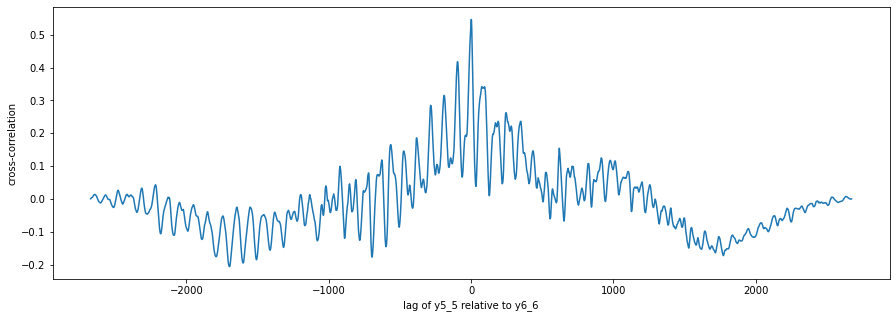

In [232]:
npts = len(dec3_rh)
lags = np.arange(-npts + 1, npts)
ccov = np.correlate(y5_5 - y5_5.mean(), y6_6 - y6_6.mean(), mode='full')
ccor = ccov / (npts * y5_5.std() * y6_6.std())
fig= plt.figure(figsize=(15,5))
plt.plot(lags, ccor)
plt.ylabel('cross-correlation')
plt.xlabel('lag of y5_5 relative to y6_6')

maxlag = lags[np.argmax(ccor)]
print("max correlation is at lag %d" % maxlag)
print("max correlation is ", round(max(ccor),3))
corr, _ = pearsonr(y5_5, y6_6) 
print('Pearsons correlation: %.3f' % corr) 
MSE = mean_squared_error(dec3_rh['PM10_3'], dec3_rh['PM10'])
MAE = mean_absolute_error(dec3_rh['PM10_3'], dec3_rh['PM10'])
print("MSE: ", MSE)
print("MAE: ", MAE)
print("RMSE ", np.sqrt(mean_squared_error(dec3_rh['PM10_3'], dec3_rh['PM10'])))